In [ ]:
#Critical libraries
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime, timedelta

#1. Load and Inspect Data

df2 = pd.read_csv('/content/Fcfm.Auto.cleanedFood Hampers Fact_CMPT3835.csv')
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')
df

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,unique id_y,marker_cluster,age,dependents_qty,postal_code,latitude,longitude,distance_to_center,Week,weekly_index
0,0.008973,2023-07-27 0:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-24/2023-07-30,2023-07-24/2023-07-30
1,0.008973,2023-08-26 0:00,263,2023-08-26 0:00,2023-08-26 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-08-21/2023-08-27,2023-08-21/2023-08-27
2,0.008973,2023-09-25 0:00,308,2023-09-25 0:00,2023-09-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-09-25/2023-10-01,2023-09-25/2023-10-01
3,0.008973,2023-10-25 0:00,330,2023-10-25 0:00,2023-10-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-10-23/2023-10-29,2023-10-23/2023-10-29
4,0.008973,2023-11-24 0:00,392,2023-11-24 0:00,2023-11-24 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-11-20/2023-11-26,2023-11-20/2023-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 3:00,330,2024-10-26 3:00,2024-10-26 3:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 16:59,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-10-21/2024-10-27,2024-10-21/2024-10-27
16601,0.000361,2024-11-26 4:00,470,2024-11-26 4:00,2024-11-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-11-25/2024-12-01,2024-11-25/2024-12-01
16602,0.000361,2024-12-26 4:00,363,2024-12-26 4:00,2024-12-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-12-23/2024-12-29,2024-12-23/2024-12-29
16603,0.000361,2025-01-26 4:00,311,2025-01-26 4:00,2025-01-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2025-01-20/2025-01-26,2025-01-20/2025-01-26


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# data loading.
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Rename the column
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

essential_features = ['latitude', 'longitude', 'postal_code']

# Convert 'timestamp' column to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])
# Define the target column (ensure it exists)
target_column = 'quantity'


numerical_features = df.select_dtypes(include=np.number).columns
X = df[numerical_features].drop(columns=[target_column])
y = df[target_column]

# Calculate mutual information scores
feature_importance_mutual_info = mutual_info_classif(X, y)

# Create DataFrame for mutual information scores and sort
feature_importance_mutual_info = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': feature_importance_mutual_info})
feature_importance_mutual_info = feature_importance_mutual_info.sort_values(by='Mutual Information Score', ascending=False)  # Sort in descending order

# Calculate correlation with target variable, excluding non-numeric and target and sort
feature_importance_corr = df[numerical_features].corr()[target_column].drop(target_column)
feature_importance_corr = feature_importance_corr.sort_values(ascending=False)

# 1. Combine Feature Importance Scores
feature_importances = {}
for feature, score in zip(feature_importance_mutual_info['Feature'], feature_importance_mutual_info['Mutual Information Score']):
    feature_importances[feature] = {'Mutual Information':

for feature, score in zip(feature_importance_corr.index, feature_importance_corr.values):
    if feature in feature_importances:
        feature_importances[feature]['Correlation'] = score
    else:
        feature_importances[feature] = {'Correlation': score}

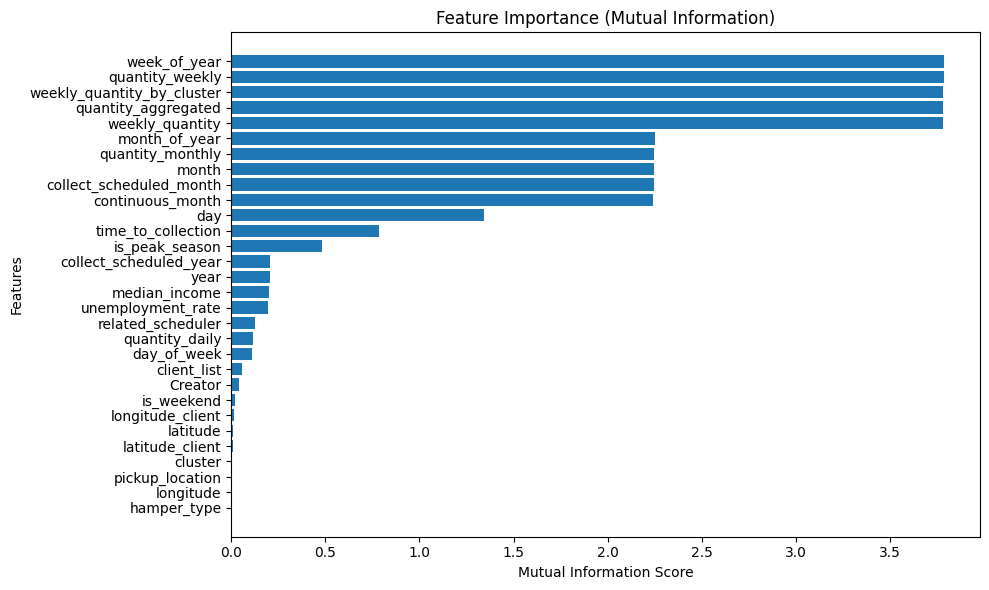

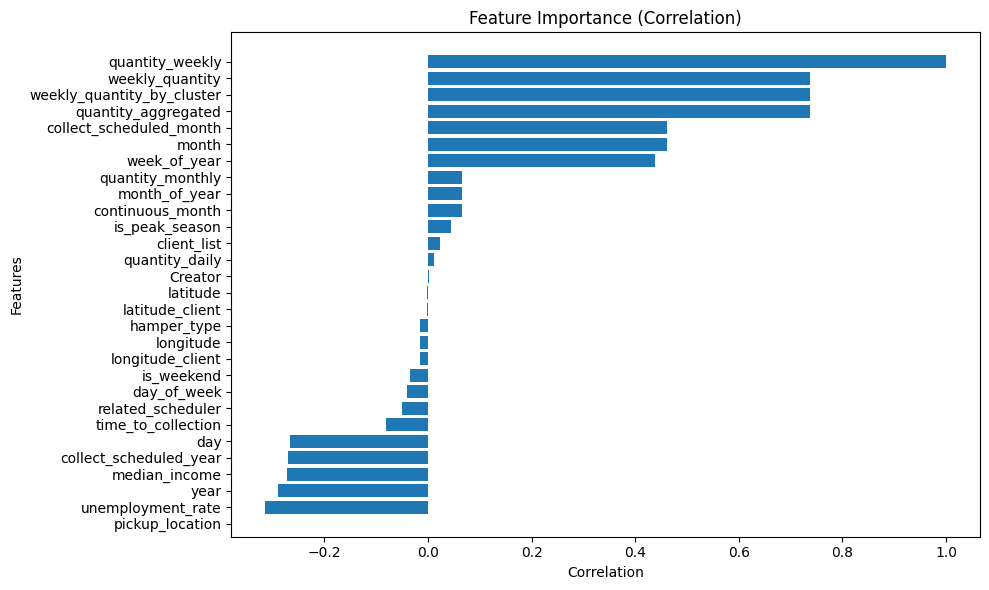

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

# ... (Your existing code for data loading and feature importance calculations) ...
df = pd.read_csv('Fcfm.Auto.cleanedFood Hampers Fact_CMPT3835.csv')  # Assuming the file exists

# Rename the column
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Define the target column (ensure it exists)
target_column = 'quantity'

# Assuming df is your DataFrame
# Replace 'target_variable' with the actual name of your target variable column
# Exclude 'timestamp' and any other non-numeric columns from X
# Include only numeric features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
X = df[numerical_features].drop(columns=[target_column])  # Exclude target variable
y = df[target_column]

# Calculate mutual information scores
feature_importance_mutual_info = mutual_info_classif(X, y)

# Create DataFrame for mutual information scores and sort
feature_importance_mutual_info = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': feature_importance_mutual_info})
feature_importance_mutual_info = feature_importance_mutual_info.sort_values(by='Mutual Information Score', ascending=False)  # Sort in descending order

# Calculate correlation with target variable, excluding non-numeric and target and sort
feature_importance_corr = df[numerical_features].corr()[target_column].drop(target_column)  # Exclude target variable itself
feature_importance_corr = feature_importance_corr.sort_values(ascending=False)  # Sort in descending order



# Plotting Mutual Information
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_mutual_info['Feature'], feature_importance_mutual_info['Mutual Information Score'])
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have highest value on top
plt.tight_layout()
plt.show()

# Plotting Correlation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_corr.index, feature_importance_corr.values)
plt.title('Feature Importance (Correlation)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have highest value on top
plt.tight_layout()
plt.show()

# ... (rest of your code) ...

Feature Importance (Mutual Information Regression):
                    Feature  Mutual Information Score
15          quantity_weekly                  3.787555
3              week_of_year                  3.786867
14            month_of_year                  2.254619
13         continuous_month                  2.249476
10  collect_scheduled_month                  2.247108
17         quantity_monthly                  2.244725
5                     month                  2.244473
6                       day                  1.335172
11       time_to_collection                  0.789452
12           is_peak_season                  0.491948
4                      year                  0.201233
9    collect_scheduled_year                  0.200118
1         related_scheduler                  0.118502
7               day_of_week                  0.109062
16           quantity_daily                  0.098713
18           marker_cluster                  0.084330
0               client_list   

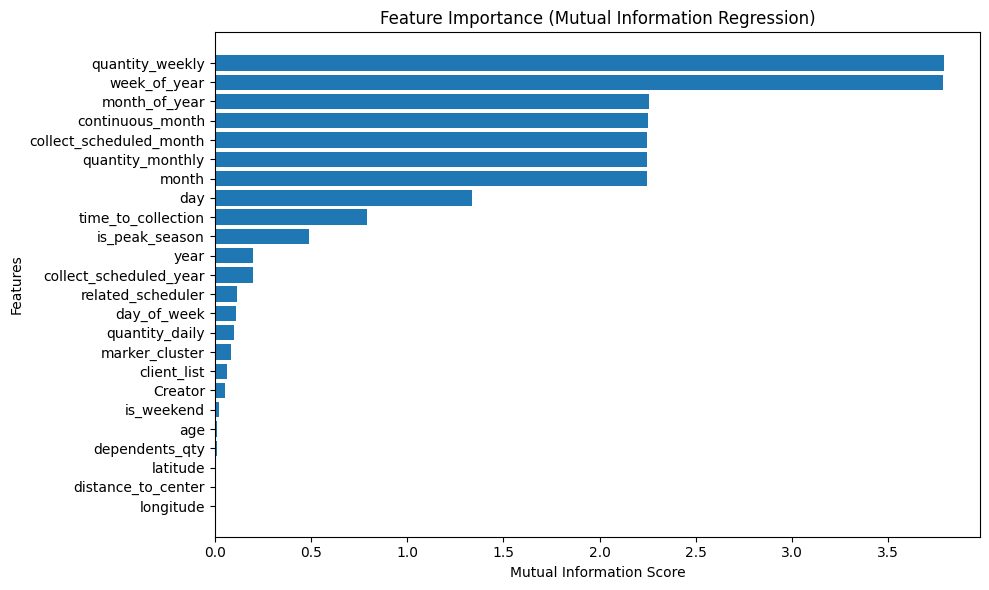

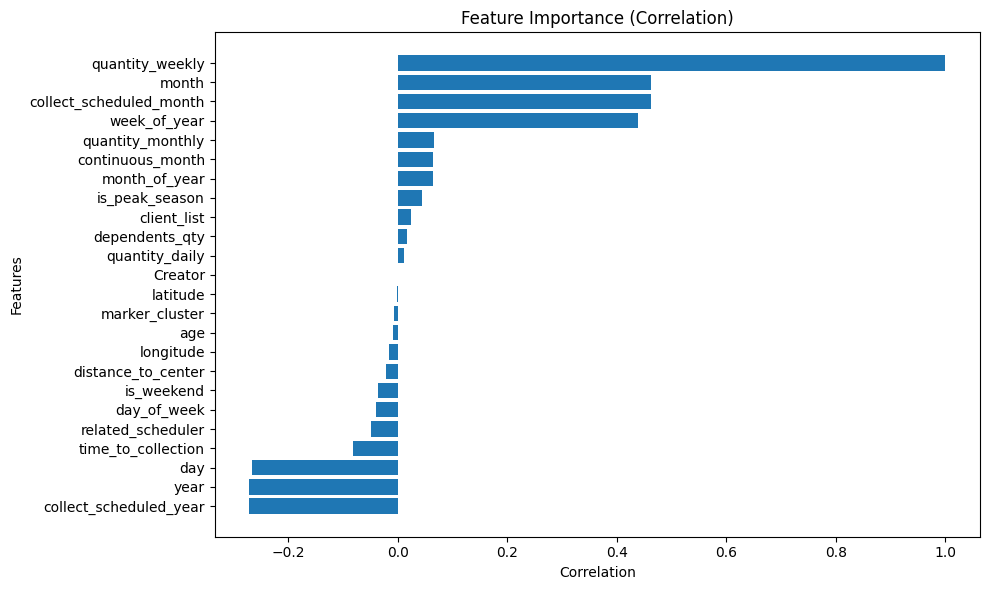

,collect_scheduled_month,quantity_weekly,month,quantity_daily,Creator,day,year,time_to_collection,is_peak_season,longitude,...,postal_code,continuous_month,latitude,week_of_year,month_of_year,day_of_week,quantity_monthly,related_scheduler,age,quantity
0,7,327,7,2497,0.001024,27,2023,179,1,-113.5103,...,T5K 1A4,7,53.5366,30,7,3,3,0.000422,53,327
1,8,263,8,2187,0.001024,26,2023,149,1,-113.5103,...,T5K 1A4,8,53.5366,34,8,5,7,0.000422,53,263
2,9,308,9,2834,0.001024,25,2023,119,0,-113.5103,...,T5K 1A4,9,53.5366,39,9,0,20,0.000422,53,308
3,10,330,10,2249,0.001024,25,2023,89,0,-113.5103,...,T5K 1A4,10,53.5366,43,10,2,34,0.000422,53,330
4,11,392,11,2364,0.001024,24,2023,59,0,-113.5103,...,T5K 1A4,11,53.5366,47,11,4,592,0.000422,53,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,10,330,10,2187,0.047877,26,2024,-64,0,-113.4465,...,T5E 3T5,22,53.7454,43,22,5,1263,0.000361,46,330
16601,11,470,11,2438,0.047877,26,2024,-95,0,-113.4465,...,T5E 3T5,23,53.7454,48,23,1,1225,0.000361,46,470
16602,12,363,12,2497,0.047877,26,2024,-125,0,-113.4465,...,T5E 3T5,24,53.7454,52,24,3,1001,0.000361,46,363
16603,1,311,1,2038,0.047877,26,2025,-156,0,-113.4465,...,T5E 3T5,25,53.7454,4,25,6,707,0.000361,46,311


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Inspect Data
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Rename the column
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the target column
target_column = 'quantity'

# 2. Feature Importance Calculations
# a) Correlation Analysis
numerical_features = df.select_dtypes(include=np.number).columns
X = df[numerical_features].drop(columns=[target_column])
y = df[target_column]

# Calculate mutual information scores using mutual_info_regression
feature_importance_mutual_info = mutual_info_regression(X, y)

# Create DataFrame for mutual information scores and sort
feature_importance_mutual_info = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': feature_importance_mutual_info})
feature_importance_mutual_info = feature_importance_mutual_info.sort_values(by='Mutual Information Score', ascending=False)

# Calculate correlation with target variable, excluding non-numeric and target and sort
feature_importance_corr = df[numerical_features].corr()[target_column].drop(target_column)
feature_importance_corr = feature_importance_corr.sort_values(ascending=False)

# Print the feature importance DataFrames with values
print("Feature Importance (Mutual Information Regression):")
print(feature_importance_mutual_info)

print("\nFeature Importance (Correlation):")
print(feature_importance_corr)

# 3. Plotting
# Plotting Mutual Information
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_mutual_info['Feature'], feature_importance_mutual_info['Mutual Information Score'])
plt.title('Feature Importance (Mutual Information Regression)')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plotting Correlation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_corr.index, feature_importance_corr.values)
plt.title('Feature Importance (Correlation)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Combine Feature Importance Scores
feature_importances = {}
for feature, score in zip(feature_importance_mutual_info['Feature'], feature_importance_mutual_info['Mutual Information Score']):
    feature_importances[feature] = {'Mutual Information': score}

for feature, score in zip(feature_importance_corr.index, feature_importance_corr.values):
    if feature in feature_importances:
        feature_importances[feature]['Correlation'] = score
    else:
        feature_importances[feature] = {'Correlation': score}

feature_importance_df = pd.DataFrame.from_dict(feature_importances, orient='index')

# 5. Rank Features
feature_importance_df['Average Rank'] = feature_importance_df[['Mutual Information', 'Correlation']].rank(ascending=False).mean(axis=1)
feature_importance_df = feature_importance_df.sort_values(by='Average Rank')

# 6. Select Top Features and Include Essentials
top_features = feature_importance_df.head(20).index.tolist()
essential_features = ['latitude', 'longitude', 'postal_code']
selected_features = list(set(top_features + essential_features))

# 7. Create df_selected
df_selected = df[selected_features + ['quantity']].copy()
df_selected.to_csv('dfs1.csv', index=False)
df_selected

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Conv1D, Flatten, Concatenate

# Define the number of timesteps and features for the time series data
timesteps = 10
num_features = 5
num_geo_features = 3  s

# Define input layers
time_series_input = Input(shape=(timesteps, num_features), name="time_series_input")  # LSTM input
geo_input = Input(shape=(num_geo_features,), name="geo_input")  # Geospatial features

# Time-Series Processing (LSTM)
x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)

# Geospatial Data Processing (Dense Layers)
y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)

# Merge LSTM & Geospatial branches
merged = Concatenate()([x, y])

# Output layers for quantity and wait time (removing category output)
quantity_output = Dense(1, activation="linear", name="quantity_output")(merged)
wait_time_output = Dense(1, activation="linear", name="wait_time_output")(merged)

# Define Model (without category output)
model = Model(inputs=[time_series_input, geo_input], outputs=[quantity_output, wait_time_output])

# Compile Model (adjust loss and metrics)
model.compile(optimizer="adam",
              loss={"quantity_output": "mse", "wait_time_output": "mse"},
              metrics={"quantity_output": "mae", "wait_time_output": "mae"})

# Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ time_series_input         │ (None, 10, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 10, 64)         │         17,920 │ time_series_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ geo_input (InputLayer)    │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 32)             │         12,416 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │            128 │ geo_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │            528 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │            528 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32)             │              0 │ dense[0][0],           │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ quantity_output (Dense)   │ (None, 1)              │             33 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ wait_time_output (Dense)  │ (None, 1)              │             33 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 31,586 (123.38 KB)

 Trainable params: 31,586 (123.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
df

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,unique id_y,marker_cluster,age,dependents_qty,postal_code,latitude,longitude,distance_to_center,Week,weekly_index
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-24/2023-07-30,2023-07-24/2023-07-30
1,0.008973,2023-08-26 00:00:00,263,2023-08-26 0:00,2023-08-26 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-08-21/2023-08-27,2023-08-21/2023-08-27
2,0.008973,2023-09-25 00:00:00,308,2023-09-25 0:00,2023-09-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-09-25/2023-10-01,2023-09-25/2023-10-01
3,0.008973,2023-10-25 00:00:00,330,2023-10-25 0:00,2023-10-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-10-23/2023-10-29,2023-10-23/2023-10-29
4,0.008973,2023-11-24 00:00:00,392,2023-11-24 0:00,2023-11-24 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-11-20/2023-11-26,2023-11-20/2023-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 16:59,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-10-21/2024-10-27,2024-10-21/2024-10-27
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-11-25/2024-12-01,2024-11-25/2024-12-01
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-12-23/2024-12-29,2024-12-23/2024-12-29
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2025-01-20/2025-01-26,2025-01-20/2025-01-26


In [ ]:
#Feature Engineering for Your Multi-Output Prediction Model
#1️⃣ Time-Series Feature Engineering (For LSTM)
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week"] = df["timestamp"].dt.isocalendar().week
df["day"] = df["timestamp"].dt.day
df["day_of_week"] = df["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["hour"] = df["timestamp"].dt.hour
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)


In [ ]:
#Lag Features (Past Demand)
df["lag_7"] = df["quantity"].shift(7)
df["lag_14"] = df["quantity"].shift(14)
df["lag_30"] = df["quantity"].shift(30)

In [ ]:
#Rolling Averages (Smoother Trends)
df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()

In [ ]:
# Geospatial Feature Engineering
 #Latitude & Longitude Processing

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])



True

In [ ]:
#Distance to Key Locations
from geopy.distance import geodesic

def calculate_distance(row, center_coords):
    return geodesic((row["latitude"], row["longitude"]), center_coords).km

#df["dist_to_food_bank"] = df.apply(lambda row: calculate_distance(row, (53.5461, -113.4938)), axis=1)
df["dist_to_store"] = df.apply(lambda row: calculate_distance(row, (53.5461, -113.4938)), axis=1)

In [ ]:
#Preparing Data for Model Input
#LSTM Needs 3D Input (samples, timesteps, features)
import numpy as np

timesteps = 7  # Use past 7 days for each prediction
features = ["lag_7", "lag_14", "lag_30", "day_of_week", "is_weekend"]

X_time_series = []
y = []

for i in range(timesteps, len(df)):
    X_time_series.append(df[features].iloc[i-timesteps:i].values)
    y.append(df["quantity"].iloc[i])

X_time_series = np.array(X_time_series)
y = np.array(y)  # Shape: (samples,)


In [ ]:
#Geospatial Data Should Be 2D (samples, features)
geo_features = ["latitude", "longitude", "location_cluster", "dist_to_store"]
X_geo = df[geo_features].values


In [ ]:
# Columns to drop
columns_to_drop = ['unique id_x', 'unique id_y', 'dist_to_convenience_store ', 'dist_to_food_bank ']

# Drop columns that exist, ignore others
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Create a copy of the modified DataFrame
df2 = df.copy()
df2

,week_of_year,day_of_week,hour,quarter,is_weekend,latitude,longitude,location_cluster,dist_to_food_bank,lag_7,lag_14,lag_30,rolling_mean_7,rolling_std_7,postal_code,continuous_month,dependents_qty,weekly_index,quantity
0,30,3,0,3,0,53.5366,-113.5103,1,1.521330,NaN,NaN,NaN,327.000000,NaN,T5K 1A4,7,1,2023-07-24/2023-07-30,327
1,34,5,0,3,1,53.5366,-113.5103,1,1.521330,NaN,NaN,NaN,295.000000,45.254834,T5K 1A4,8,1,2023-08-21/2023-08-27,263
2,39,0,0,3,0,53.5366,-113.5103,1,1.521330,NaN,NaN,NaN,299.333333,32.868425,T5K 1A4,9,1,2023-09-25/2023-10-01,308
3,43,2,0,4,0,53.5366,-113.5103,1,1.521330,NaN,NaN,NaN,307.000000,30.908467,T5K 1A4,10,1,2023-10-23/2023-10-29,330
4,47,4,0,4,0,53.5366,-113.5103,1,1.521330,NaN,NaN,NaN,324.000000,46.491935,T5K 1A4,11,1,2023-11-20/2023-11-26,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,43,5,3,4,1,53.7454,-113.4465,4,22.401233,271.0,221.0,237.0,317.857143,60.559691,T5E 3T5,22,7,2024-10-21/2024-10-27,330
16601,48,1,4,4,0,53.7454,-113.4465,4,22.401233,268.0,293.0,225.0,346.714286,78.355417,T5E 3T5,23,7,2024-11-25/2024-12-01,470
16602,52,3,4,4,0,53.7454,-113.4465,4,22.401233,392.0,327.0,260.0,342.571429,76.301719,T5E 3T5,24,7,2024-12-23/2024-12-29,363
16603,4,6,4,1,1,53.7454,-113.4465,4,22.401233,404.0,327.0,327.0,329.285714,71.786058,T5E 3T5,25,7,2025-01-20/2025-01-26,311


In [ ]:
# Columns to drop
columns_to_drop = ['unique id_x', 'unique id_y', 'dist_to_convenience_store ', 'dist_to_food_bank ']

# Drop the columns if they exist
for column in columns_to_drop:
    if column in df2.columns:
        df2.drop(columns=[column], inplace=True, errors='ignore')

# Display the updated DataFrame
df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
#imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df2['lag_7'] = imputer.fit_transform(df2[['quantity']])
df2['lag_14'] = imputer.fit_transform(df2[['quantity']])
df2['lag_30'] = imputer.fit_transform(df2[['quantity']])
df2['rolling_std_7'] = imputer.fit_transform(df2[['quantity']])
df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
df2

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,weekly_index,week,hour,lag_7,lag_14,lag_30,rolling_mean_7,rolling_std_7,location_cluster,dist_to_store
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,2023-07-24/2023-07-30,30,0,327.0,327.0,327.0,327.000000,327.0,1,1.521330
1,0.008973,2023-08-26 00:00:00,263,2023-08-26 0:00,2023-08-26 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,2023-08-21/2023-08-27,34,0,263.0,263.0,263.0,295.000000,263.0,1,1.521330
2,0.008973,2023-09-25 00:00:00,308,2023-09-25 0:00,2023-09-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,2023-09-25/2023-10-01,39,0,308.0,308.0,308.0,299.333333,308.0,1,1.521330
3,0.008973,2023-10-25 00:00:00,330,2023-10-25 0:00,2023-10-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,2023-10-23/2023-10-29,43,0,330.0,330.0,330.0,307.000000,330.0,1,1.521330
4,0.008973,2023-11-24 00:00:00,392,2023-11-24 0:00,2023-11-24 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,2023-11-20/2023-11-26,47,0,392.0,392.0,392.0,324.000000,392.0,1,1.521330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 16:59,2024-08-23 17:00,...,2024-10-21/2024-10-27,43,3,330.0,330.0,330.0,317.857143,330.0,4,22.401233
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2024-11-25/2024-12-01,48,4,470.0,470.0,470.0,346.714286,470.0,4,22.401233
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2024-12-23/2024-12-29,52,4,363.0,363.0,363.0,342.571429,363.0,4,22.401233
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2025-01-20/2025-01-26,4,4,311.0,311.0,311.0,329.285714,311.0,4,22.401233


In [ ]:
#2️⃣ Time-Series Feature Engineering🔹 Convert timestamps & extract temporal features

df2["timestamp"] = pd.to_datetime(df2["timestamp"])

# Extract relevant date-time components
df2["year"] = df2["timestamp"].dt.year
df2["month"] = df2["timestamp"].dt.month
df2["week_of_year"] = df2["timestamp"].dt.isocalendar().week
df2["day_of_week"] = df2["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df2["hour"] = df2["timestamp"].dt.hour
df2["quarter"] = df2["timestamp"].dt.quarter
df2["is_weekend"] = df2["day_of_week"].isin([5, 6]).astype(int)

df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


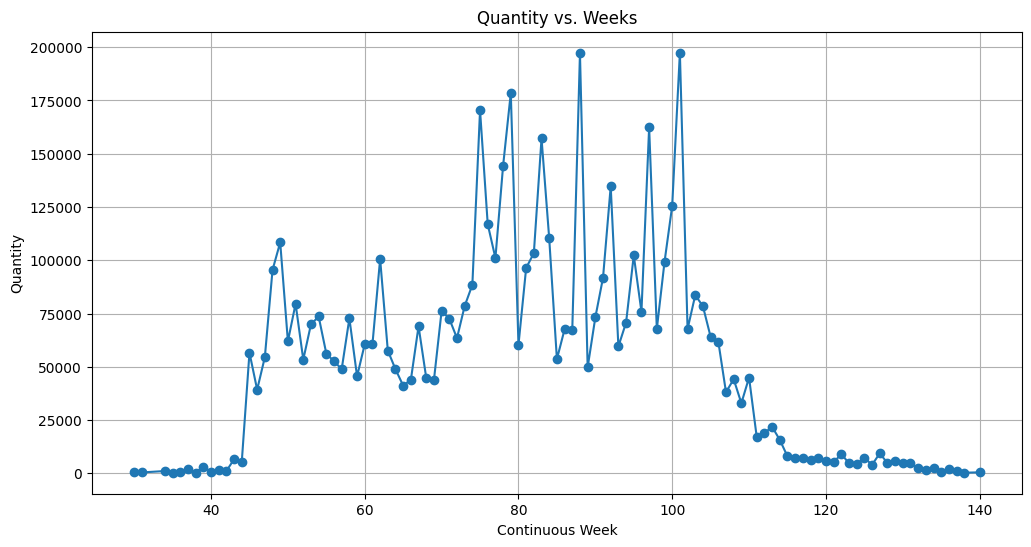

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'collect_scheduled_date' to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract year and week
df['year'] = df['timestamp'].dt.year
df['week'] = df['timestamp'].dt.isocalendar().week

# 3. Create a continuous week index
df['continuous_week'] = (df['year'] - df['year'].min()) * 52 + df['week']

# 4. Group by continuous week and sum quantity
weekly_quantity = df.groupby('continuous_week')['quantity'].sum().reset_index()

# 5. Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity['continuous_week'], weekly_quantity['quantity'], marker='o')
plt.title('Quantity vs. Weeks')
plt.xlabel('Continuous Week')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [ ]:
# Check for Skweness (skwed or unstablized)
print(df['quantity'].skew())

0.7303685935937724


In [ ]:
# Box-Cox Transformation
from scipy import stats  # Import the entire scipy.stats module

weekly_quantity['quantity_boxcox'], lambda_value = stats.boxcox(weekly_quantity['quantity'])

print(f"Optimal lambda value: {lambda_value}")

# Calculate skewness of the Box-Cox transformed data
skewness_boxcox = weekly_quantity['quantity_boxcox'].skew()
print(f"Skewness after Box-Cox transformation: {skewness_boxcox}")

Optimal lambda value: 0.32575033704562106
Skewness after Box-Cox transformation: -0.2781607020680989


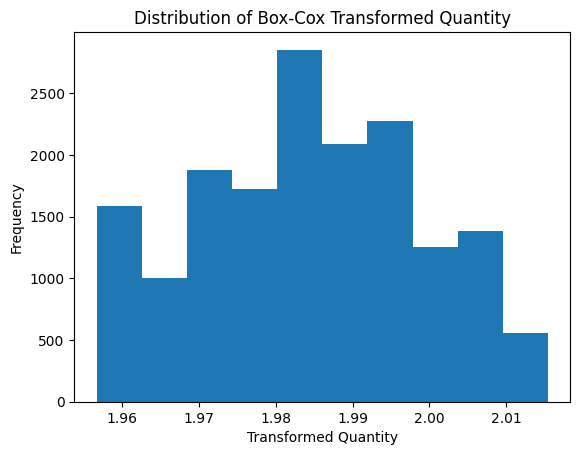

In [ ]:
# After Box-Cox transformation
from scipy.stats import boxcox
df['quantity_boxcox'], _ = boxcox(df['quantity'] + 1)
df['quantity_boxcox'].plot(kind='hist')
plt.title('Distribution of Box-Cox Transformed Quantity')
plt.xlabel('Transformed Quantity')
plt.ylabel('Frequency')
plt.show()

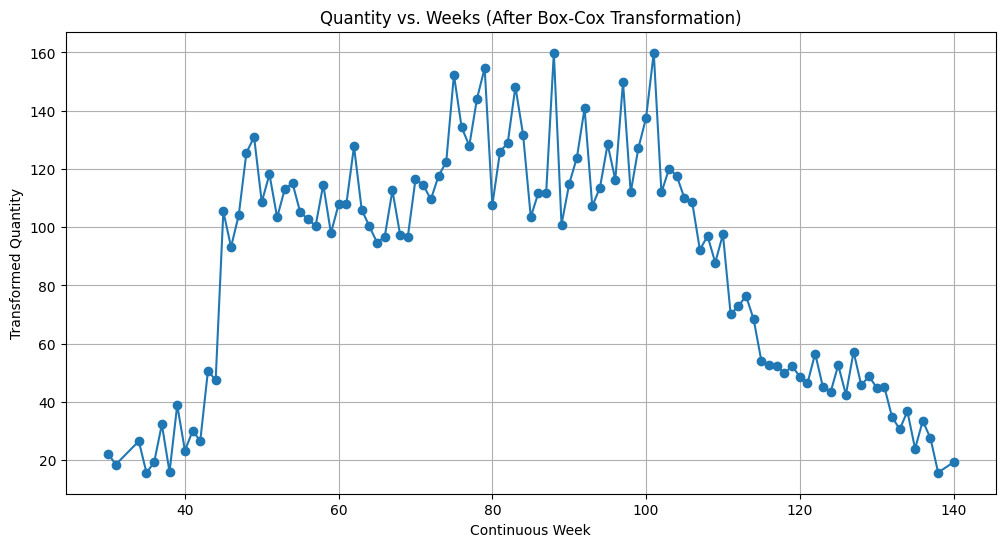

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Convert 'collect_scheduled_date' to datetime
df[''] = pd.to_datetime(df['timestamp'])

# 2. Extract year and week
df['year'] = df['timestamp'].dt.year
df['week'] = df['timestamp'].dt.isocalendar().week

# 3. Create a continuous week index
df['continuous_week'] = (df['year'] - df['year'].min()) * 52 + df['week']

# 4. Group by continuous week and sum quantity
weekly_quantity = df.groupby('continuous_week')['quantity'].sum().reset_index()

# 5. Apply Box-Cox transformation to 'quantity'
weekly_quantity['quantity_boxcox'], lambda_value = stats.boxcox(weekly_quantity['quantity'])

# 6. Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity['continuous_week'], weekly_quantity['quantity_boxcox'], marker='o')  # Use transformed data
plt.title('Quantity vs. Weeks (After Box-Cox Transformation)')
plt.xlabel('Continuous Week')
plt.ylabel('Transformed Quantity')
plt.grid(True)
plt.show()

In [ ]:
# Creating Lagged Features and Determining Optimal Lags
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure time_index is a datetime column before using it for groupby
df['time_index'] = pd.to_datetime(df['timestamp'])

# Now you can use time_index for grouping
time_series = df.groupby('time_index')['quantity'].sum()

# ... (Rest of your code remains the same) ...
time_series = df.groupby('time_index')['quantity'].sum()  # Replace 'quantity' with your target variable column
time_series = time_series.to_frame()  #Target

# Create lagged features using pandas shift()
time_series['lag_7'] = time_series['quantity'].shift(7)
time_series['lag_14'] = time_series['quantity'].shift(14)
time_series['lag_30'] = time_series['quantity'].shift(30)
time_series = time_series.dropna()

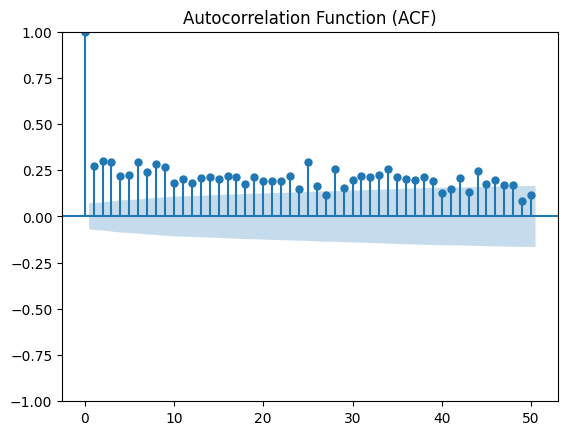

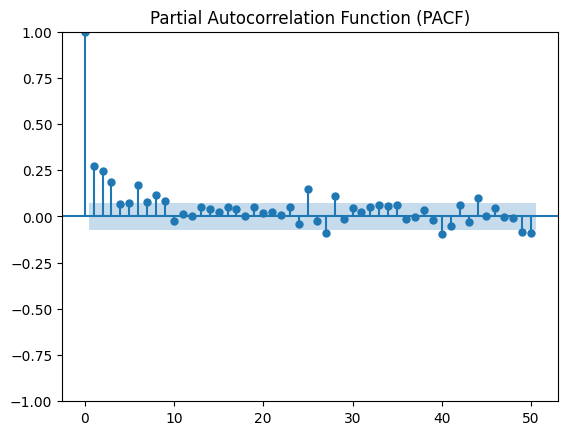

In [ ]:
# ACF and PACF to determine optimal lags:
# PloPlott ACF
plot_acf(time_series['quantity'], lags=50)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(time_series['quantity'], lags=50)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

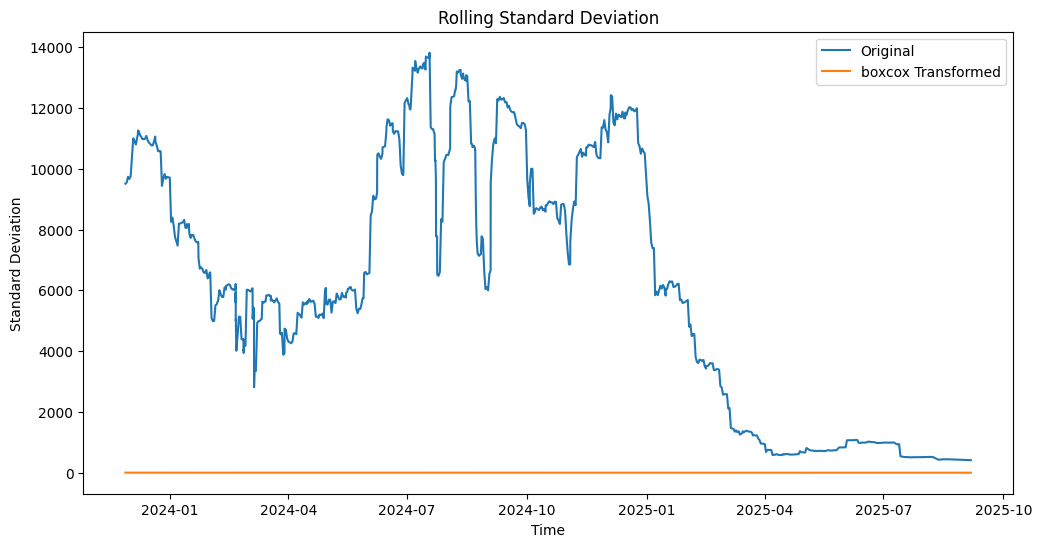

In [ ]:
#Calculate and plot rolling standard deviation:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling standard deviation

time_series['rolling_std_original'] = time_series['quantity'].rolling(window=30).std()

# Apply Box-Cox transformation to 'quantity' column in time_series DataFrame

time_series['quantity_boxcox'], lambda_value = stats.boxcox(time_series['quantity']) # Apply Box-Cox to 'quantity' column
time_series['rolling_std_boxcox'] = time_series['quantity_boxcox'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['rolling_std_original'], label='Original')
plt.plot(time_series.index, time_series['rolling_std_boxcox'], label='boxcox Transformed')
plt.title('Rolling Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

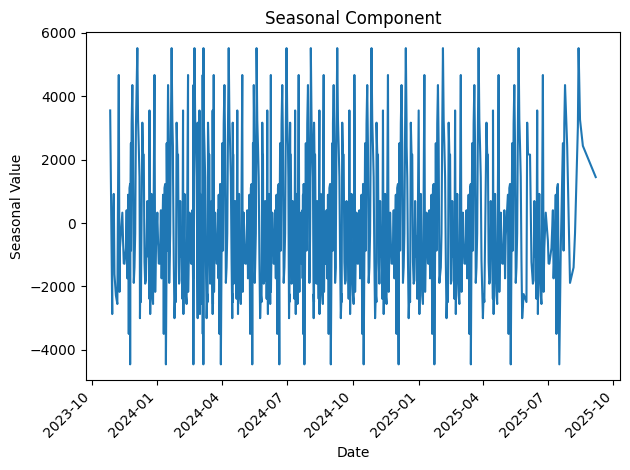

In [ ]:
# Incorporates seasonality for time series with recurring patterns(SARIMA).
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only the relevant column for decomposition (e.g., 'quantity')
decomposition_series = time_series['quantity']  # the column to decompose

# Perform seasonal decomposition
result = seasonal_decompose(decomposition_series, model='additive', period=52)

# Access the seasonal component
seasonal_values = result.seasonal

# Convert the index of seasonal_values to datetime objects
seasonal_values.index = pd.to_datetime(seasonal_values.index)

# Plot the seasonal component
plt.plot(seasonal_values.index, seasonal_values.values)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Create Lag Features (Past Trends)
df2["lag_7"] = df2["quantity"].shift(7)
df2["lag_14"] = df2["quantity"].shift(14)   # One week before
df2["lag_30"] = df2["quantity"].shift(30) # One month before
df2.isnull().sum()



,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
#imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df2['lag_7'] = imputer.fit_transform(df2[['quantity']])
df2['lag_14'] = imputer.fit_transform(df2[['quantity']])
df2['lag_30'] = imputer.fit_transform(df2[['quantity']])
df2['rolling_std_7'] = imputer.fit_transform(df2[['quantity']])
df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
#Rolling Averages (Smooth Demand Trends)
df2["rolling_mean_7"] = df2["quantity"].rolling(window=7, min_periods=1).mean()
df2["rolling_std_7"] = df2["quantity"].rolling(window=7, min_periods=1).std()
#Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df2['rolling_std_7'] = imputer.fit_transform(df2[['quantity']])
df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
#3️⃣ Geospatial Feature Engineerin🔹 Clustering Based on Location
from sklearn.cluster import KMeans

# Apply K-Means clustering on latitude & longitude
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df2["location_cluster"] = kmeans.fit_predict(df2[["latitude", "longitude"]])


In [ ]:
#Compute Distance to the Nearest Food Bank
from geopy.distance import geodesic

# Define the reference food bank coordinates (e.g., Edmonton central location)
food_bank_coords = (53.5461, -113.4938)

# Compute distance for each record
df2["dist_to_food_bank"] = df2.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), food_bank_coords).km, axis=1
)


In [ ]:
#5️⃣ Clean & Prepare Data for Modeling
#Select Final Feature Set for Model Input
features = [
    "year", "month", "week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
    "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7",
    "latitude", "longitude", "location_cluster", "dist_to_food_bank"
]
target = "quantity"

# Split features and target
X = df2[features]
y = df2[target]


In [ ]:
# Summary of Processing Steps
#Step                                 	Action
#1.   Load Data	                        Read CSV file & check missing values
#2.  Time-Series Features	              Extract timestamps, create lag features, rolling averages
#3.  Geospatial Features	              Cluster locations, compute distances to food banks
#4.  Normalize Data	                    Scale socioeconomic features
#5.  Prepare for Modeling	              Drop missing values, select features

In [ ]:
df2

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,marker_cluster,age,dependents_qty,postal_code,latitude,longitude,distance_to_center,Week,weekly_index,dist_to_food_bank
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-24/2023-07-30,2023-07-24/2023-07-30,1.521330
7,0.008973,2023-07-27 03:00:00,327,2023-07-27 3:00,2023-07-27 3:00,2023-07-27 16:12,0.000120,1696013590859x172792487259963780,2023-07-27 16:10,2023-07-27 16:12,...,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-24/2023-07-30,2023-07-24/2023-07-30,1.521330
9,0.008973,2023-08-01 00:00:00,398,2023-08-01 0:00,2023-08-01 0:00,2023-08-01 10:54,0.000301,1696013590859x172792487259963780,2023-08-01 10:53,2023-08-01 10:54,...,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-31/2023-08-06,2023-07-31/2023-08-06,1.521330
13,0.000903,2023-08-22 00:00:00,263,2023-08-22 0:00,2023-08-23 0:00,2023-08-22 10:45,0.000301,1689345689019x623399745786478600,2023-08-22 9:59,2024-02-19 10:32,...,44,22,1,T5H 2Z8,53.5514,-113.4916,0.607629,2023-08-21/2023-08-27,2023-08-21/2023-08-27,0.607629
14,0.008973,2023-08-23 00:00:00,263,2023-08-23 0:00,2023-08-23 0:00,2023-08-23 9:51,0.000301,1696013590859x172792487259963780,2023-08-23 9:48,2023-08-23 9:51,...,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-08-21/2023-08-27,2023-08-21/2023-08-27,1.521330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16497,0.000783,2025-08-13 03:00:00,234,2025-08-13 3:00,2025-08-13 3:00,2024-08-13 15:48,0.000783,1723573885972x921731358435835900,2024-08-13 15:47,2024-08-13 15:48,...,2280,45,6,T6H 0B2,53.3753,-113.4585,19.153224,2025-08-11/2025-08-17,2025-08-11/2025-08-17,19.153224
16484,0.000783,2025-08-13 03:00:00,234,2025-08-13 3:00,2025-08-13 3:00,2024-08-13 16:21,0.000783,1696015711515x484186703883626050,2024-08-13 15:25,2024-08-13 15:25,...,1433,4,5,T5X 2J3,53.6313,-113.5245,9.698008,2025-08-11/2025-08-17,2025-08-11/2025-08-17,9.698008
16534,0.000783,2025-08-15 03:00:00,234,2025-08-15 3:00,2025-08-15 3:00,2024-08-15 18:03,0.000783,1723754861552x584585952824655900,2024-08-15 17:59,2024-08-15 17:59,...,2282,44,1,T5A 1X4,53.5931,-113.4077,7.739526,2025-08-11/2025-08-17,2025-08-11/2025-08-17,7.739526
16561,0.000783,2025-08-19 03:00:00,263,2025-08-19 3:00,2025-08-19 3:00,2024-08-19 18:04,0.000783,1724097941351x759785133646282800,2024-08-19 18:04,2024-08-19 18:05,...,2282,28,4,T6X 1V3,53.4154,-113.4178,15.396508,2025-08-18/2025-08-24,2025-08-18/2025-08-24,15.396508


In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])
#create a weekly time index
df['weekly_index'] = df['timestamp'].dt.to_period('W')

#3. Calculate weekly total quantity:
weekly_quantity = df.groupby('weekly_index')['quantity'].sum()
print(weekly_quantity)

#4. Add weekly quantity to the original dataframe:
df = df.merge(weekly_quantity, left_on='weekly_index', right_index=True, how='left')
df.rename(columns={'quantity_y': 'weekly_quantity', 'quantity_x': 'quantity'}, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.tail()

weekly_index
2023-07-24/2023-07-30     654
2023-07-31/2023-08-06     398
2023-08-21/2023-08-27    1052
2023-08-28/2023-09-03     260
2023-09-04/2023-09-10     445
                         ... 
2025-07-28/2025-08-03     796
2025-08-04/2025-08-10    2010
2025-08-11/2025-08-17    1170
2025-08-18/2025-08-24     263
2025-09-01/2025-09-07     445
Freq: W-SUN, Name: quantity, Length: 108, dtype: int64


,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,marker_cluster,age,dependents_qty,postal_code,latitude,longitude,distance_to_center,Week,weekly_index,weekly_quantity
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 16:59,2024-08-23 17:00,...,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-10-21/2024-10-27,2024-10-21/2024-10-27,102300
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-11-25/2024-12-01,2024-11-25/2024-12-01,125490
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-12-23/2024-12-29,2024-12-23/2024-12-29,78408
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2025-01-20/2025-01-26,2025-01-20/2025-01-26,44162
16604,0.000361,2024-08-26 14:36:00,260,2024-08-26 14:36,2024-08-26 14:36,2024-08-26 14:36,0.000060,1709066244591x646971172426088400,2024-08-26 14:36,2024-08-26 14:36,...,2221,31,2,T5G 0V4,53.5705,-113.5051,2.816993,2024-08-26/2024-09-01,2024-08-26/2024-09-01,67340


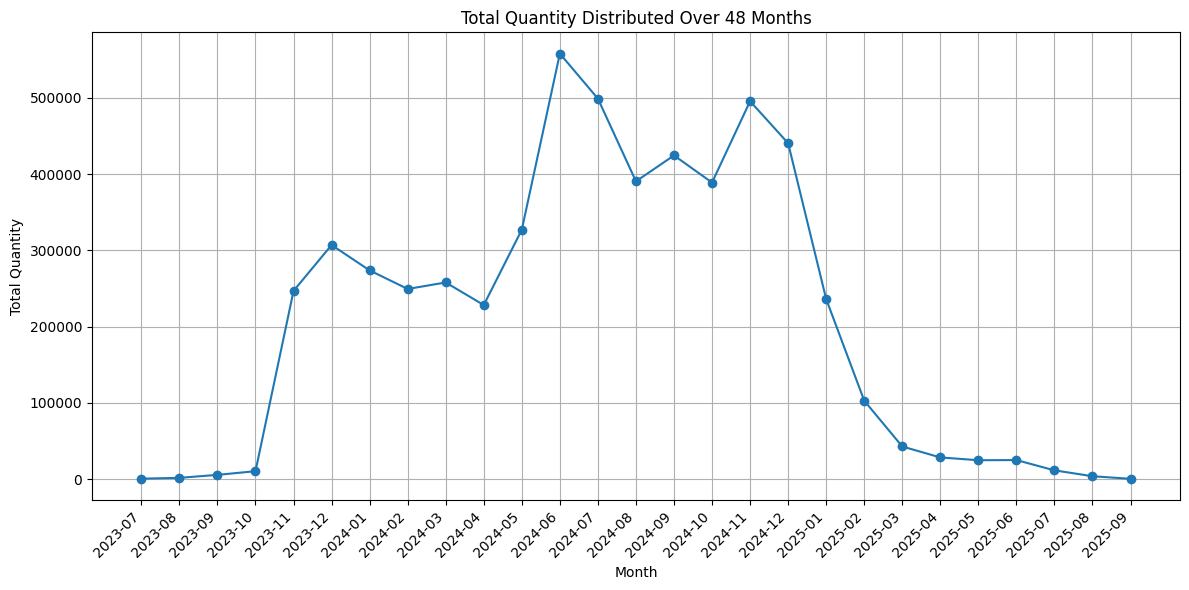

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['monthly_index'] = df['timestamp'].dt.to_period('M')
monthly_quantity = df.groupby('monthly_index')['quantity'].sum()
monthly_quantity_48months = monthly_quantity[:48]

plt.figure(figsize=(12, 6))
plt.plot(monthly_quantity_48months.index.astype(str), monthly_quantity_48months.values, marker='o')
plt.title('Total Quantity Distributed Over 48 Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# LSTM Model for Time-Series Prediction
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features and target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# Assuming df is your DataFrame with engineered features
# Drop NaN values from df (or the actual DataFrame name if not df)

# Ensure all features are numeric in df (or the actual DataFrame name if not df) and handle errors
for feature in features:
    if df2[feature].dtype == 'object':
        # If the feature is categorical, use Label Encoding to convert it to numeric
        le = LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature].astype(str))
    else:
        # If the feature is not numeric and not an object, convert it to numeric with error handling
        df2[feature] = pd.to_numeric(df2[feature], errors='coerce')
        # Fill NaN values with the mean of the column (or another strategy)
        df2[feature] = df2[feature].fillna(df2[feature].mean())

# ... (Rest of the code remains the same)
# Split dataset chronologically
# 1. Split data into training and testing sets
# Use the last 3 months for testing
train_data = df2[:-90]
test_data = df2[-90:]

# 2. Create TimeSeriesSplit object
n_splits = 5  # Number of cross-validation splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# 3. Iterate through the splits and train models (optional for cross-validation)
# This part is commented out as it's not essential for the initial training
# but can be used to evaluate model performance with cross-validation
"""
for train_index, test_index in tscv.split(train_data.index):
    X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]
    y_train, y_test = X_train['quantity'], X_test['quantity']
    # ... (train your model here using X_train, y_train, X_test, y_test) ...
"""

# Split data into train and test sets (using train_test_split for simplicity)
X_train, X_test, y_train, y_test = train_test_split(
    df2[features], df2[target], test_size=0.2, random_state=42
)

# Convert the features to numeric type before reshaping
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Build LSTM model with InputLayer
lstm_model = Sequential()
lstm_model.add(InputLayer(input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(16, activation="relu"))
lstm_model.add(Dense(1))

# Compile model
lstm_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32,
              validation_data=(X_test_lstm, y_test), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 107974.3047 - mae: 318.1873 - val_loss: 52078.2070 - val_mae: 214.4278
Epoch 2/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 35009.6055 - mae: 164.6252 - val_loss: 7946.5264 - val_mae: 67.4153
Epoch 3/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7725.2197 - mae: 67.9667 - val_loss: 6076.3169 - val_mae: 61.8948
Epoch 4/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5595.3315 - mae: 56.1479 - val_loss: 2131.6943 - val_mae: 32.6106
Epoch 5/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3269.3787 - mae: 42.7737 - val_loss: 1284.5199 - val_mae: 25.4837
Epoch 6/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2775.7708 - mae: 40.5634 - val_loss: 1144.9152 - val_mae: 25.1532
Epoch 7/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2734.6287 - mae: 40.2464 - val_loss: 848.4758 - val_mae: 20.2123
Epoch 8/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2517.9768 - mae: 38.4998 - val_loss: 747.2459 - val_

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]  # Added rolling features
target = "quantity"

#  Step 2: Check for missing features
missing_features = [f for f in features if f not in df2.columns]
if missing_features:
    raise ValueError(f"Missing columns in dataframe: {missing_features}")

#  Step 3: Drop NaN values from df2
df2 = df2.dropna().reset_index(drop=True)

#  Step 4: Convert categorical/object data to numeric
for feature in features:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.to_numeric(df2[feature], errors='coerce')
        df2[feature] = df2[feature].fillna(df2[feature].mean())  # Fill NaNs

# Step 5: Ensure sorting by timestamp (if exists)
if 'timestamp' in df2.columns:
    df2 = df2.sort_values(by="timestamp")

#  Step 6: Train-test split (80-20)
split_point = int(len(df2) * 0.8)
train, test = df2.iloc[:split_point], df2.iloc[split_point:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

#  Step 7: Reshape for LSTM
X_train_lstm = np.array(X_train).astype('float32').reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.array(X_test).astype('float32').reshape((X_test.shape[0], 1, X_test.shape[1]))

#  Step 8: Define the LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, len(features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)
])

#  Step 9: Compile Model
lstm_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

#  Step 10: Train Model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

#  Step 11: Evaluate Model
loss, mae = lstm_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


416/416 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 102119.3828 - mae: 310.0437 - val_loss: 75310.2344 - val_mae: 260.4617
Epoch 2/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 37326.3711 - mae: 174.8215 - val_loss: 20219.9961 - val_mae: 116.5359
Epoch 3/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8096.1787 - mae: 68.8313 - val_loss: 10497.2549 - val_mae: 76.8073
Epoch 4/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6379.1069 - mae: 64.4699 - val_loss: 9824.9404 - val_mae: 73.8806
Epoch 5/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 6117.8164 - mae: 63.1965 - val_loss: 9934.4785 - val_mae: 74.3835
Epoch 6/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 6063.6069 - mae: 62.8722 - val_loss: 9790.4678 - val_mae: 73.7032
Epoch 7/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5991.1289 - mae: 61.8417 - val_loss: 6458.3887 - val_mae: 53.7662
Epoch 8/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3290.3777 - mae: 43.8009 - val_loss: 3298.1350 - val_mae:

In [ ]:
# XGBoost Model for Additional Accuracy
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
xgb_mae = np.mean(abs(xgb_model.predict(X_test) - y_test))

print(f"LSTM MAE: {lstm_mae}")
print(f"XGBoost MAE: {xgb_mae}")


LSTM MAE: 17.204320907592773
XGBoost MAE: 0.0020517902322577915


In [ ]:
# Model Plan
# Step 1: Preprocess Data (Sort by time, create lags, rolling stats)
# Step 2: Train-Test Split (Chronological split: 80% train, 20% test)
# Step 3: Train LSTM for Time-Series Forecasting
# Step 4: Train XGBoost for Additional Pattern Learning
# Step 5: Evaluate Model Performance

In [ ]:
#LSTM + XGBoost hybrid model
#Full Model Pipeline
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load dataset
#  Step 5: Ensure sorting by timestamp (if exists)
if 'timestamp' in df2.columns:
    df2 = df2.sort_values(by="timestamp")

df2["timestamp"] = pd.to_datetime(df2["timestamp"])

# Sort data by time for chronological split
df2 = df2.sort_values(by="timestamp")

# Define train-test split (80% train, 20% test)
split_point = int(len(df2) * 0.8)
train = df2.iloc[:split_point]
test = df2.iloc[split_point:]

# Define features and target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30",
            "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# Extract training and testing data
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


# Create a copy of the dataframes to avoid modifying the original df2
X_train = X_train.copy()
X_test = X_test.copy()

for feature in features:
    if X_train[feature].dtype == 'object':
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature].astype(str))
        X_test[feature] = le.transform(X_test[feature].astype(str))

    # Ensure all features are numeric after Label Encoding or other conversions
    X_train[feature] = pd.to_numeric(X_train[feature], errors='coerce').astype(np.float32)
    X_test[feature] = pd.to_numeric(X_test[feature], errors='coerce').astype(np.float32)


# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# --- LSTM MODEL ---
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)
])

# Compile model
lstm_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# --- XGBOOST MODEL ---
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
xgb_mae = np.mean(abs(xgb_model.predict(X_test) - y_test))

print(f"LSTM MAE: {lstm_mae}")
print(f"XGBoost MAE: {xgb_mae}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


416/416 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 102214.7656 - mae: 310.5788 - val_loss: 80240.9375 - val_mae: 269.7608
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 39506.3594 - mae: 181.0778 - val_loss: 20282.9199 - val_mae: 116.7689
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8255.7959 - mae: 69.3803 - val_loss: 10434.6924 - val_mae: 76.5483
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6186.0752 - mae: 63.1475 - val_loss: 9844.0195 - val_mae: 73.9621
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5544.0059 - mae: 58.5983 - val_loss: 6768.0620 - val_mae: 61.9720
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3203.2878 - mae: 43.6677 - val_loss: 3501.4888 - val_mae: 38.9543
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2495.8247 - mae: 38.6609 - val_loss: 2848.7053 - val_mae: 36.7158
Epoch 8/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2263.3242 - mae: 37.1709 - val_loss: 2424.3494 - val_mae: 3

In [ ]:
!pip install keras-tuner -q
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train_lstm, y_train, epochs=10, validation_data=(X_test_lstm, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_lstm, y_train, epochs=10, validation_data=(X_test_lstm, y_test))

Trial 26 Complete [00h 00m 47s]
val_mae: 18.15513801574707

Best val_mae So Far: 11.06264591217041
Total elapsed time: 00h 08m 45s
Epoch 1/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 91426.3047 - mae: 289.2698 - val_loss: 27309.7598 - val_mae: 141.5271
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9239.9297 - mae: 73.7502 - val_loss: 9726.0059 - val_mae: 73.4005
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5674.9937 - mae: 60.6811 - val_loss: 5548.1455 - val_mae: 49.3204
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2278.7070 - mae: 35.6776 - val_loss: 2852.6492 - val_mae: 36.4151
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1772.8356 - mae: 32.1530 - val_loss: 2091.3198 - val_mae: 30.1825
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1503.6881 - mae: 29.1316 - val_loss: 1748.0615 - val_mae: 26.3965
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1341.2286 - mae: 27.7648 - val_loss: 1631.0963 -

In [ ]:
!pip install keras-tuner -q
import keras_tuner as kt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Data Loading
# 2. Define the Model Builder Function with Hyperparameter Options
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=16, max_value=256, step=16),
                   return_sequences=True,
                   input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=16, max_value=128, step=16)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# 3. Instantiate the Keras Tuner (Hyperband or RandomSearch)
# Choose either Hyperband or RandomSearch:

# Hyperband:
tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt',
                     executions_per_trial=2)  # More exploration

# RandomSearch:
# tuner = kt.RandomSearch(
#     model_builder,
#     objective='val_mae',
#     max_trials=10,
#     directory='my_dir',
#     project_name='random_search'
# )

# 4. Search for Best Hyperparameters
tuner.search(X_train_lstm, y_train, epochs=20, validation_data=(X_test_lstm, y_test))

# 5. Get Best Model and Train
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_lstm, y_train, epochs=20, validation_data=(X_test_lstm, y_test))

# 6. Evaluate the Model
loss, mae = model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 105471.0078 - mae: 315.9699 - val_loss: 95301.2734 - val_mae: 296.3638
Epoch 2/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 53447.6016 - mae: 216.9804 - val_loss: 33576.7617 - val_mae: 161.5760
Epoch 3/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 13934.7139 - mae: 93.6396 - val_loss: 12760.1514 - val_mae: 86.2063
Epoch 4/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6204.2969 - mae: 61.8553 - val_loss: 10023.0322 - val_mae: 74.7819
Epoch 5/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6082.9790 - mae: 62.5554 - val_loss: 9863.4238 - val_mae: 74.0585
Epoch 6/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6009.9009 - mae: 62.8099 - val_loss: 9808.1455 - val_mae: 73.8002
Epoch 7/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5983.7998 - mae: 62.9314 - val_loss: 9689.6035 - val_mae: 72.9097
Epoch 8/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [ ]:
imputer = SimpleImputer(strategy='mean')
df2['rolling_mean_7'] = imputer.fit_transform(df2[['rolling_mean_7']]) # Pass the column as a DataFrame using double brackets
df2['rolling_std_7'] = imputer.fit_transform(df2[['rolling_std_7']]) # Pass the column as a DataFrame using double brackets
df2

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,hour,lag_7,lag_14,lag_30,rolling_mean_7,rolling_std_7,location_cluster,dist_to_store,quarter,dist_to_food_bank
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,0,327.0,327.0,327.0,327.000000,327.0,1,1.521330,3,1.521330
7,0.008973,2023-07-27 03:00:00,327,2023-07-27 3:00,2023-07-27 3:00,2023-07-27 16:12,0.000120,1696013590859x172792487259963780,2023-07-27 16:10,2023-07-27 16:12,...,3,327.0,327.0,327.0,333.571429,327.0,1,1.521330,3,1.521330
9,0.008973,2023-08-01 00:00:00,398,2023-08-01 0:00,2023-08-01 0:00,2023-08-01 10:54,0.000301,1696013590859x172792487259963780,2023-08-01 10:53,2023-08-01 10:54,...,0,398.0,398.0,398.0,346.428571,398.0,1,1.521330,3,1.521330
13,0.000903,2023-08-22 00:00:00,263,2023-08-22 0:00,2023-08-23 0:00,2023-08-22 10:45,0.000301,1689345689019x623399745786478600,2023-08-22 9:59,2024-02-19 10:32,...,0,263.0,263.0,263.0,300.571429,263.0,1,0.607629,3,0.607629
14,0.008973,2023-08-23 00:00:00,263,2023-08-23 0:00,2023-08-23 0:00,2023-08-23 9:51,0.000301,1696013590859x172792487259963780,2023-08-23 9:48,2023-08-23 9:51,...,0,263.0,263.0,263.0,291.428571,263.0,1,1.521330,3,1.521330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16497,0.000783,2025-08-13 03:00:00,234,2025-08-13 3:00,2025-08-13 3:00,2024-08-13 15:48,0.000783,1723573885972x921731358435835900,2024-08-13 15:47,2024-08-13 15:48,...,3,234.0,234.0,234.0,267.857143,234.0,3,19.153224,3,19.153224
16484,0.000783,2025-08-13 03:00:00,234,2025-08-13 3:00,2025-08-13 3:00,2024-08-13 16:21,0.000783,1696015711515x484186703883626050,2024-08-13 15:25,2024-08-13 15:25,...,3,234.0,234.0,234.0,267.857143,234.0,1,9.698008,3,9.698008
16534,0.000783,2025-08-15 03:00:00,234,2025-08-15 3:00,2025-08-15 3:00,2024-08-15 18:03,0.000783,1723754861552x584585952824655900,2024-08-15 17:59,2024-08-15 17:59,...,3,234.0,234.0,234.0,269.571429,234.0,1,7.739526,3,7.739526
16561,0.000783,2025-08-19 03:00:00,263,2025-08-19 3:00,2025-08-19 3:00,2024-08-19 18:04,0.000783,1724097941351x759785133646282800,2024-08-19 18:04,2024-08-19 18:05,...,3,263.0,263.0,263.0,277.142857,263.0,3,15.396508,3,15.396508


In [ ]:
!pip install keras-tuner -q
import keras_tuner as kt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



# --- Convert object type features to numeric using Label Encoding ---
for feature in df2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df2[feature] = le.fit_transform(df2[feature].astype(str))

# --- Scale numerical features using MinMaxScaler ---
scaler = MinMaxScaler()
numerical_features = df2.select_dtypes(include=['number']).columns.difference(['quantity'])  # Exclude target
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

# 2. Define Features and Target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# 3. Train-Test Split (Chronological Split)
# Ensure sorting by timestamp (if exists)
if 'timestamp' in df2.columns:
    df2 = df2.sort_values(by="timestamp")

# Split data into training and testing sets chronologically
# Use the last 90 days as test set
train_data = df[:-90]
test_data = df[-90:]



split_point = int(len(df2) * 0.8)
train, test = df2.iloc[:split_point], df2.iloc[split_point:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# 4. Reshape for LSTM
X_train_lstm = np.array(X_train).astype('float32').reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.array(X_test).astype('float32').reshape((X_test.shape[0], 1, X_test.shape[1]))

# 5. Define the Model Builder Function with Hyperparameter Options and Regularization
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   return_sequences=True,
                   input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=16, max_value=128, step=16)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # L2 regularization
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# 6. Instantiate the Keras Tuner (BayesianOptimization)
tuner = kt.BayesianOptimization(
    model_builder,
    objective='val_mae',
    max_trials=20,  # Increased trials
    directory='my_dir',
    project_name='bayesian_opt'
)

# 7. Search for Best Hyperparameters
tuner.search(X_train_lstm, y_train, epochs=20, validation_data=(X_test_lstm, y_test))

# 8. Get Best Model and Train
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_lstm, y_train, epochs=30, validation_data=(X_test_lstm, y_test))  # Increased epochs

# 9. Evaluate the Model
loss, mae = model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Trial 20 Complete [00h 01m 29s]
val_mae: 2.316776990890503

Best val_mae So Far: 1.5958335399627686
Total elapsed time: 00h 40m 39s
Epoch 1/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 86437.8359 - mae: 279.6967 - val_loss: 21164.6621 - val_mae: 120.0122
Epoch 2/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 8784.1553 - mae: 72.2553 - val_loss: 6243.2666 - val_mae: 50.2436
Epoch 3/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3544.7498 - mae: 44.5021 - val_loss: 2242.2834 - val_mae: 24.9663
Epoch 4/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2497.8167 - mae: 38.6126 - val_loss: 1132.6802 - val_mae: 18.4778
Epoch 5/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2391.7976 - mae: 37.5613 - val_loss: 775.0841 - val_mae: 17.0971
Epoch 6/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2167.2893 - mae: 36.0124 - val_loss: 416.3666 - val_mae: 10.8194
Epoch 7/50
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2141.5828 - mae: 35.8553 - val_loss: 393.8037 -

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load past data to compute lag/rolling features
df2 = pd.read_csv("/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv", parse_dates=["timestamp"])
df2.sort_values("timestamp", inplace=True)



# Train your XGBoost model (replace with your actual model training code)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, "xgb_hybrid_model.pkl")
# ----------------------------------
# Load model, encoder, and scalers
# ----------------------------------
model = joblib.load("xgb_hybrid_model.pkl")


In [ ]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, "location_kmeans.pkl")
# Save the KMeans model
joblib.dump(kmeans, "location_kmeans.pkl")

# Create and fit the LabelEncoder for postal_code
postal_encoder = LabelEncoder()

df2['postal_code'] = df2['postal_code'].astype(str)
postal_encoder.fit(df2['postal_code'])

# Save the postal_encoder
joblib.dump(postal_encoder, "postal_encoder.pkl")

# ... (rest of your code) ...

['postal_encoder.pkl']

In [ ]:
# Load past data to compute lag/rolling features
df2 = pd.read_csv("/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv", parse_dates=["timestamp"])
df2.sort_values("timestamp", inplace=True)



# Before the loop, calculate 'dist_to_food_bank'
if 'dist_to_food_bank' not in df2.columns:
    food_bank_coords = (53.5461, -113.4938)
    df2['dist_to_food_bank'] = df2.apply(
        lambda row: geodesic((row['latitude'], row['longitude']), food_bank_coords).km, axis=1
    )



last_row = df2.iloc[-1]
for col in ["latitude", "longitude", "dist_to_food_bank"]:
    future_df[col] = last_row[col]



In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
from geopy.distance import geodesic


# Load model, encoder, and scalers

model = joblib.load("xgb_hybrid_model.pkl")
kmeans = joblib.load("location_kmeans.pkl")
postal_encoder = joblib.load("postal_encoder.pkl")

# Load past data to compute lag/rolling features
df2 = pd.read_csv("/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv", parse_dates=["timestamp"])
df2.sort_values("timestamp", inplace=True)


# Calculate 'dist_to_food_bank' immediately after loading the CSV:

food_bank_coords = (53.5461, -113.4938)  # Define food bank coordinates
df2['dist_to_food_bank'] = df2.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), food_bank_coords).km, axis=1
)

# Define features used during training
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]


# Generate future dates (next 7 days)

future_dates = pd.date_range(start=df2['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=7, freq='D')
future_df = pd.DataFrame({'timestamp': future_dates})

# Add calendar/time features
future_df['week_of_year'] = future_df['timestamp'].dt.isocalendar().week.astype(int)
future_df['day_of_week'] = future_df['timestamp'].dt.dayofweek
future_df['hour'] = 12  # Assume midday if hour is needed
future_df['quarter'] = future_df['timestamp'].dt.quarter
future_df['is_weekend'] = (future_df['day_of_week'] >= 5).astype(int)


# Use the last known location and demographic info
last_row = df2.iloc[-1]
for col in ["latitude", "longitude", "dist_to_food_bank"]:  # Removed postal_code and dependents_qty
    future_df[col] = last_row[col]

# Cluster lat/lon to location_cluster
future_df["location_cluster"] = kmeans.predict(future_df[["latitude", "longitude"]])


# Create lag & rolling features
# Create lag & rolling features
df_extended = pd.concat([df2, future_df], ignore_index=True)
df_extended["quantity"] = df_extended["quantity"].ffill()

# Calculate lag features for future dates based on previous values
for i in range(len(df2), len(df_extended)):
    df_extended.loc[i, "lag_7"] = df_extended.loc[i - 7, "quantity"]
    df_extended.loc[i, "lag_14"] = df_extended.loc[i - 14, "quantity"]
    df_extended.loc[i, "lag_30"] = df_extended.loc[i - 30, "quantity"]


# Calculate rolling features using a rolling window that includes past data
df_extended["rolling_mean_7"] = df_extended["quantity"].rolling(window=7, min_periods=1).mean()
df_extended["rolling_std_7"] = df_extended["quantity"].rolling(window=7, min_periods=1).std()

# Take only the new rows (i.e., last 7) and select relevant features
future_final = df_extended.iloc[-7:][features].copy()

# Remove unwanted columns (if they exist)
future_final = future_final.drop(columns=['weekly_index', 'dependents_qty', 'continuous_month', 'postal_code'], errors='ignore')


future_final.fillna(0, inplace=True)


preds = model.predict(future_final)

print("📈 Predictions for the Next 7 Days:")
for date, value in zip(future_dates, preds):
    print(f"{date.date()}: {value:.2f}")

📈 Predictions for the Next 7 Days:
2025-09-07: 6.32
2025-09-08: 6.32
2025-09-09: 6.32
2025-09-10: 6.32
2025-09-11: 6.32
2025-09-12: 6.32
2025-09-13: 6.32


In [ ]:
df2.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
pickup_date,0
related_scheduler,0
unique_client,0
Creation Date,0
Modified Date,0


In [ ]:
# Better Prediction Flow (Quick Version)
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')
df

,client_list,timestamp,quantity,datetime_from,datetime_to,pickup_date,related_scheduler,unique_client,Creation Date,Modified Date,...,unique id_y,marker_cluster,age,dependents_qty,postal_code,latitude,longitude,distance_to_center,Week,weekly_index
0,0.008973,2023-07-27 0:00,327,2023-07-27 0:00,2023-07-27 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-07-24/2023-07-30,2023-07-24/2023-07-30
1,0.008973,2023-08-26 0:00,263,2023-08-26 0:00,2023-08-26 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-08-21/2023-08-27,2023-08-21/2023-08-27
2,0.008973,2023-09-25 0:00,308,2023-09-25 0:00,2023-09-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-09-25/2023-10-01,2023-09-25/2023-10-01
3,0.008973,2023-10-25 0:00,330,2023-10-25 0:00,2023-10-25 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-10-23/2023-10-29,2023-10-23/2023-10-29
4,0.008973,2023-11-24 0:00,392,2023-11-24 0:00,2023-11-24 0:00,2024-01-22 17:01,0.000422,1696013590859x172792487259963780,2023-07-27 15:57,2023-07-27 15:57,...,1696013590859x172792487259963780,511,53,1,T5K 1A4,53.5366,-113.5103,1.521330,2023-11-20/2023-11-26,2023-11-20/2023-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 3:00,330,2024-10-26 3:00,2024-10-26 3:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 16:59,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-10-21/2024-10-27,2024-10-21/2024-10-27
16601,0.000361,2024-11-26 4:00,470,2024-11-26 4:00,2024-11-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-11-25/2024-12-01,2024-11-25/2024-12-01
16602,0.000361,2024-12-26 4:00,363,2024-12-26 4:00,2024-12-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2024-12-23/2024-12-29,2024-12-23/2024-12-29
16603,0.000361,2025-01-26 4:00,311,2025-01-26 4:00,2025-01-26 4:00,2024-08-23 13:22,0.000361,1724441761751x379664611190243300,2024-08-23 17:00,2024-08-23 17:00,...,1724441761751x379664611190243300,2284,46,7,T5E 3T5,53.7454,-113.4465,22.401233,2025-01-20/2025-01-26,2025-01-20/2025-01-26


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

# --- 1. Load and preprocess data ---
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.sort_values('timestamp').reset_index(drop=True)

# --- 2. Time-based features ---
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['weekofyear'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month

def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(np.ceil(adjusted_dom / 7.0))

df['weekofmonth'] = df['timestamp'].apply(week_of_month)

# --- 3. Lag and rolling features ---
df['lag_1'] = df['quantity'].shift(1)
df['rolling_3'] = df['quantity'].rolling(window=3).mean()

# --- 4. Drop missing values ---
df = df.dropna()

# --- 5. Train/test split (last 7 days for testing) ---
train = df.iloc[:-7]
test = df.iloc[-7:]

features = ['dayofweek', 'weekofyear', 'month', 'weekofmonth', 'lag_1', 'rolling_3']
target = 'quantity'

train_X, train_y = train[features], train[target]
test_X, test_y = test[features], test[target]

# --- 6. Model + TimeSeriesSplit + GridSearchCV ---
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'gamma': [0]
}

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(train_X, train_y)
best_model = grid_search.best_estimator_

# --- 7. Prediction ---
preds = best_model.predict(test_X)
print("Predictions for the Next 7 Days:")
for i, date in enumerate(test['timestamp']):
    print(f"{date.date()}: {round(preds[i], 2)}")

# --- 8. Evaluate ---
mse = mean_squared_error(test_y, preds)
print(f"\nTest MSE: {mse:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Predictions for the Next 7 Days:
2025-08-12: 263.5
2025-08-12: 251.02000427246094
2025-08-13: 233.92999267578125
2025-08-13: 233.92999267578125
2025-08-15: 233.92999267578125
2025-08-19: 242.0
2025-09-06: 330.0400085449219

Test MSE: 2116.7717


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# 1. Load your dataset (example)

df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Rename 'collect_scheduled_date' to 'timestamp'
if 'collect_scheduled_date' in df.columns and 'timestamp' not in df.columns:
    df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort by timestamp to ensure chronological order
df = df.sort_values(by=['timestamp'])

# Add time-related features
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['weekofyear'] = df['timestamp'].dt.isocalendar().week
df['lag_1'] = df['quantity'].shift(1)
df['rolling_3'] = df['quantity'].rolling(window=3).mean()
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# Drop rows with NaN values
df = df.dropna()


cutoff_date = df['timestamp'].max() - pd.DateOffset(days=60)

# Create train and test sets
train = df[df['timestamp'] <= cutoff_date]
test = df[df['timestamp'] > cutoff_date]

# Define features and target
features = ['dayofweek', 'weekofyear', 'lag_1', 'rolling_3', 'is_weekend']
target = 'quantity'

# Extract training and testing data
train_X, train_y = train[features], train[target]
test_X, test_y = test[features], test[target]


# 6. Run Grid Search with Cross Validation model
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'gamma': [0]
}

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid_search.fit(train_X, train_y)
best_model = grid_search.best_estimator_

#7. Prediction
preds = best_model.predict(test_X)

# 8. Create a new column in the original DataFrame to store predictions
df.loc[test.index, 'predicted'] = preds

# 9. Print predictions for the next 7 days
for i in range(len(test)):
    print(f"{df.loc[test.index[i], 'timestamp'].date()}: {round(preds[i], 2)}")

# 10. Evaluate
mse = mean_squared_error(test_y, preds)
print(f"\nTest MSE: {mse:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
2025-07-09: 249.8300018310547
2025-07-09: 249.8300018310547
2025-07-11: 249.8300018310547
2025-07-12: 249.8300018310547
2025-07-12: 249.8300018310547
2025-07-13: 249.8300018310547
2025-07-13: 249.8300018310547
2025-07-14: 267.95001220703125
2025-07-14: 297.69000244140625
2025-07-15: 312.8999938964844
2025-07-17: 312.8999938964844
2025-07-19: 312.8999938964844
2025-07-22: 322.9700012207031
2025-07-22: 327.1700134277344
2025-07-23: 327.05999755859375
2025-07-23: 327.05999755859375
2025-07-23: 327.05999755859375
2025-07-23: 327.05999755859375
2025-07-24: 327.05999755859375
2025-07-25: 327.05999755859375
2025-07-28: 370.5899963378906
2025-08-01: 381.6700134277344
2025-08-06: 381.6400146484375
2025-08-06: 354.7699890136719
2025-08-06: 334.94000244140625
2025-08-06: 334.94000244140625
2025-08-08: 334.94000244140625
2025-08-08: 334.94000244140625
2025-08-12: 260.3299865722656
2025-08-12: 256.57000732421875
2025-08-13: 234.020004272460

In [ ]:
# Sorting the test set to ensure unique predictions per date
test = test.sort_values(by='timestamp')

# Feature engineering
df['lag_2'] = df['quantity'].shift(2)
df['lag_3'] = df['quantity'].shift(3)
df['rolling_7'] = df['quantity'].rolling(window=7).mean()

# Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the train and test data
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Model training with grid search
grid_search.fit(train_X_scaled, train_y)

# Make predictions on the test set
preds = grid_search.predict(test_X_scaled)

# Ensure predictions are aligned with dates in test set
test['predictions'] = preds

# Plotting residuals
residuals = test_y - preds
import matplotlib.pyplot as plt
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Print predictions
pred_dates = pd.to_datetime(test['timestamp']).dt.date
for date, pred in zip(pred_dates, preds):
    print(f"{date}: {pred}")

# Evaluate the model performance (MSE)
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(test_y, preds)
print(f"Test MSE: {test_mse}")


In [ ]:
#Step 1: Refine Your Feature Engineering
#Create additional lag features:
df['lag_2'] = df['quantity'].shift(2)
df['lag_3'] = df['quantity'].shift(3)
df['lag_4'] = df['quantity'].shift(4)
df['lag_5'] = df['quantity'].shift(5)

In [ ]:
#2. Rolling averages:
df['rolling_7'] = df['quantity'].rolling(window=7).mean()
df['rolling_14'] = df['quantity'].rolling(window=14).mean()
df['rolling_30'] = df['quantity'].rolling(window=30).mean()

In [ ]:
from scipy import stats
import numpy as np

# Feature Engineering (Creating lag, rolling, and other features)
# Apply Box-Cox Transformation to the target variable 'quantity'
df['quantity_boxcox'], lambda_value = stats.boxcox(df['quantity'] + 1)

# --- Chronological split ---
# Calculate the cutoff date for the split (60 days before the last date)
cutoff_date = df['timestamp'].max() - pd.DateOffset(days=60)

# Create train and test sets
train = df[df['timestamp'] <= cutoff_date].copy()
test = df[df['timestamp'] > cutoff_date].copy()

# *** Add lag and rolling features to train and test directly ***
for data in [train, test]:
    data['lag_1'] = data['quantity'].shift(1)
    data['rolling_3'] = data['quantity'].rolling(window=3).mean()
    data['dayofweek'] = data['timestamp'].dt.dayofweek
    data['weekofyear'] = data['timestamp'].dt.isocalendar().week
    data['lag_2'] = data['quantity'].shift(2)
    data['lag_3'] = data['quantity'].shift(3)
    data['lag_4'] = data['quantity'].shift(4)
    data['lag_5'] = data['quantity'].shift(5)
    data['rolling_7'] = data['quantity'].rolling(window=7).mean()
    data['rolling_14'] = data['quantity'].rolling(window=14).mean()
    data['rolling_30'] = data['quantity'].rolling(window=30).mean()
    data['is_weekend'] = data['dayofweek'].isin([5, 6]).astype(int)

# Define features and target
features = ['dayofweek', 'weekofyear', 'lag_1', 'rolling_3', 'is_weekend',
            'lag_2', 'lag_3', 'lag_4', 'lag_5',  g features
target = 'quantity'

# Reset index to avoid misalignment after dropping NaN values
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Drop NaN values from train and test
train = train.dropna()
test = test.dropna()

# Extract training and testing data
train_X, train_y = train[features], train[target]
test_X, test_y = test[features], test[target]


for feature in features:
    if train_X[feature].dtype == 'object':
        le = LabelEncoder()
        train_X[feature] = le.fit_transform(train_X[feature].astype(str))
        test_X[feature] = le.transform(test_X[feature].astype(str))


train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)

X = df.drop(columns=['quantity', 'quantity_boxcox', 'timestamp'])
y = df['quantity_boxcox']  # Use transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#Step 2: Hyperparameter Tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb  # Import xgboost
from xgboost import XGBRegressor  # Import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# ... (your existing code for loading data, feature engineering, and split) ...

# 1. Load your dataset (example)

df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Rename 'collect_scheduled_date' to 'timestamp' if it's not already named 'timestamp'
if 'collect_scheduled_date' in df.columns and 'timestamp' not in df.columns:
    df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort by timestamp to ensure chronological order
df = df.sort_values(by=['timestamp'])

# Add time-related features
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['weekofyear'] = df['timestamp'].dt.isocalendar().week
df['lag_1'] = df['quantity'].shift(1)
df['rolling_3'] = df['quantity'].rolling(window=3).mean()
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# Create additional lag features
df['lag_2'] = df['quantity'].shift(2)
df['lag_3'] = df['quantity'].shift(3)
df['lag_4'] = df['quantity'].shift(4)
df['lag_5'] = df['quantity'].shift(5)

# Add rolling averages
df['rolling_7'] = df['quantity'].rolling(window=7).mean()
df['rolling_14'] = df['quantity'].rolling(window=14).mean()
df['rolling_30'] = df['quantity'].rolling(window=30).mean()

# Drop rows with NaN values after feature engineering
df = df.dropna()

# --- Chronological split ---
# Calculate the cutoff date for the split (60 days before the last date)
cutoff_date = df['timestamp'].max() - pd.DateOffset(days=60)

# Create train and test sets
train = df[df['timestamp'] <= cutoff_date]
test = df[df['timestamp'] > cutoff_date]

# Define features and target
features = ['dayofweek', 'weekofyear', 'lag_1', 'rolling_3', 'is_weekend',
            'lag_2', 'lag_3', 'lag_4', 'lag_5',  # New lag features
            'rolling_7', 'rolling_14', 'rolling_30']  # New rolling features
target = 'quantity'

# Reset index to avoid misalignment after dropping NaN values

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Extract training and testing data
train_X, train_y = train[features], train[target]
test_X, test_y = test[features], test[target]
-
for feature in features:
    if train_X[feature].dtype == 'object':
        le = LabelEncoder()
        train_X[feature] = le.fit_transform(train_X[feature].astype(str))
        test_X[feature] = le.transform(test_X[feature].astype(str))


train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)

#

param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 15),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.1),
}

# Use RandomizedSearchCV to search the space
random_search = RandomizedSearchCV(
    XGBRegressor(),  # Use XGBRegressor here
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(train_X, train_y)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6872700594236812, gamma=0.09507143064099162, learning_rate=0.15639878836228102, max_depth=7, n_estimators=714, subsample=0.7783331011414365; total time=   1.3s
[CV] END colsample_bytree=0.6872700594236812, gamma=0.09507143064099162, learning_rate=0.15639878836228102, max_depth=7, n_estimators=714, subsample=0.7783331011414365; total time=   3.3s
[CV] END colsample_bytree=0.6872700594236812, gamma=0.09507143064099162, learning_rate=0.15639878836228102, max_depth=7, n_estimators=714, subsample=0.7783331011414365; total time=   2.0s
[CV] END colsample_bytree=0.6872700594236812, gamma=0.09507143064099162, learning_rate=0.15639878836228102, max_depth=7, n_estimators=714, subsample=0.7783331011414365; total time=   1.0s
[CV] END colsample_bytree=0.6872700594236812, gamma=0.09507143064099162, learning_rate=0.15639878836228102, max_depth=7, n_estimators=714, subsample=0.7783331011414365; total time=   4.8

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa17837eb50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa176d6e3d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa17b4c8110>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa1770c30d0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
!pip install xgboost -q
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Import MinMaxScaler

# ... (your existing code for data loading and feature engineering) ...

# ... (Your hyperparameter tuning code) ...

# Define features and target
features = ['dayofweek', 'weekofyear', 'lag_1', 'rolling_3', 'is_weekend',
            'lag_2', 'lag_3', 'lag_4', 'lag_5',  # New lag features
            'rolling_7', 'rolling_14', 'rolling_30']  # New rolling features
target = 'quantity'

# --- Chronological split ---
#


train_X = train_X.copy()
test_X = test_X.copy()


for feature in features:
    if train_X[feature].dtype == 'object':
        le = LabelEncoder()
        train_X[feature] = le.fit_transform(train_X[feature].astype(str))
        test_X[feature] = le.transform(test_X[feature].astype(str))

    # Ensure all features are numeric after Label Encoding or other conversions
    train_X[feature] = pd.to_numeric(train_X[feature], errors='coerce').astype(np.float32)
    test_X[feature] = pd.to_numeric(test_X[feature], errors='coerce').astype(np.float32)


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)



# Initialize and fit the XGBoost model
model = XGBRegressor()
model.fit(train_X, train_y)

# Evaluate models
from sklearn.metrics import mean_squared_error

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Step 4: Model Tuning & Results Validation
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Evaluate the Model's Performance:


if hasattr(random_search, 'best_estimator_'):
    # Use best parameters from tuning if available
    print("Using best parameters from random_search.")
    model = XGBRegressor(**random_search.best_estimator_.get_params())
else:
    # Use default parameters if random_search was not fitted
    print("Warning: Using default parameters for XGBRegressor as random_search was not fitted.")
    model = XGBRegressor()

# Fit the model to the entire training set
model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = model.predict(test_X)


if len(y_test) != len(y_pred):
    min_len = min(len(y_test), len(y_pred))
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]
    print(f"Warning: y_test and y_pred were truncated to match lengths. Original lengths: y_test={len(y_test)}, y_pred={len(y_pred)}")  # Provide original lengths
else:
    print("y_test and y_pred have matching lengths.")

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Print feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

In [ ]:
# Step 4: Model Tuning & Results Validation

# 1. Evaluate the Model's Performance:
from sklearn.metrics import mean_squared_error
import numpy as np


if hasattr(random_search, 'best_estimator_'):
    # Use best parameters
    model = XGBRegressor(**random_search.best_estimator_.get_params())
else:

    print("Warning: Using default parameters for XGBRegressor as random_search was not fitted.")
    model = XGBRegressor()

# Fit the model to the entire training set
model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = model.predict(test_X)

# --- Ensure y_test and y_pred have the same length ---
if len(y_test) != len(y_pred):
    min_len = min(len(y_test), len(y_pred))
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]
    print("Warning: y_test and y_pred were truncated to match lengths.")

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 259.6379238647385


In [ ]:
import matplotlib.pyplot as plt


y_test_series = pd.Series(y_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_series.index, y_test_series.values, label='Actual', color='blue')
plt.plot(y_test_series.index, y_pred, label='Predicted', color='red')
plt.legend()
plt.show()

In [ ]:
# Step 5: Test Model with Future Predictions

# 1. Function to Create Features for Future Predictions
def create_features_for_future(future_dates):
    future_df = pd.DataFrame({'timestamp': future_dates})

    # Add time-related features
    future_df['dayofweek'] = future_df['timestamp'].dt.dayofweek
    future_df['weekofyear'] = future_df['timestamp'].dt.isocalendar().week
    future_df['is_weekend'] = future_df['dayofweek'].isin([5, 6]).astype(int)


    last_values = train[['quantity', 'lag_1', 'rolling_3', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'rolling_7', 'rolling_14', 'rolling_30']].tail(1).values[0]
    # Quantity initialization:
    future_df['quantity'] = [last_values[0]] + [np.nan] * (len(future_dates) - 1)

    # Initializing lag and rolling features:
    future_df['lag_1'] = [last_values[1]] + [np.nan] * (len(future_dates) - 1)
    future_df['rolling_3'] = [last_values[2]] + [np.nan] * (len(future_dates) - 1)
    future_df['lag_2'] = [last_values[3]] + [np.nan] * (len(future_dates) - 1)
    future_df['lag_3'] = [last_values[4]] + [np.nan] * (len(future_dates) - 1)
    future_df['lag_4'] = [last_values[5]] + [np.nan] * (len(future_dates) - 1)
    future_df['lag_5'] = [last_values[6]] + [np.nan] * (len(future_dates) - 1)
    future_df['rolling_7'] = [last_values[7]] + [np.nan] * (len(future_dates) - 1)
    future_df['rolling_14'] = [last_values[8]] + [np.nan] * (len(future_dates) - 1)
    future_df['rolling_30'] = [last_values[9]] + [np.nan] * (len(future_dates) - 1)

    # --- Update lag features and rolling features iteratively ---
    for i in range(1, len(future_dates)):
        future_df.loc[i, 'lag_1'] = future_df.loc[i - 1, 'quantity']
        future_df.loc[i, 'lag_2'] = future_df.loc[i - 2, 'quantity'] if i >= 2 else last_values[3]
        future_df.loc[i, 'lag_3'] = future_df.loc[i - 3, 'quantity'] if i >= 3 else last_values[4]
        future_df.loc[i, 'lag_4'] = future_df.loc[i - 4, 'quantity'] if i >= 4 else last_values[5]
        future_df.loc[i, 'lag_5'] = future_df.loc[i - 5, 'quantity'] if i >= 5 else last_values[6]
        future_df.loc[i, 'rolling_3'] = future_df.loc[i - 2:i, 'quantity'].mean() if i >= 2 else last_values[2]
        future_df.loc[i, 'rolling_7'] = future_df.loc[i - 6:i, 'quantity'].mean() if i >= 6 else last_values[7]
        future_df.loc[i, 'rolling_14'] = future_df.loc[i - 13:i, 'quantity'].mean() if i >= 13 else last_values[8]
        future_df.loc[i, 'rolling_30'] = future_df.loc[i - 29:i, 'quantity'].mean() if i >= 29 else last_values[9]

    # Drop the temporary 'quantity' column used for calculations
    future_df = future_df.drop(columns=['quantity'])
    return future_df[features]


# 2. Make predictions for future dates:
future_dates = pd.date_range(start='2025-08-12', periods=7, freq='D')
future_data = create_features_for_future(future_dates)

future_predictions = random_search.best_estimator_.predict(future_data)

for date, prediction in zip(future_dates, future_predictions):
    print(f"{date.date()}: {prediction}")

2025-08-12: 245.04827880859375
2025-08-13: 245.04827880859375
2025-08-14: 166.34213256835938
2025-08-15: 515.96044921875
2025-08-16: 516.20556640625
2025-08-17: 527.8323364257812
2025-08-18: 493.02008056640625


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.cluster import KMeans


# ... (Your existing code for data loading, feature engineering, etc.) ...

# 1. Data Preparation
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# Ensure df2 has the required features
# --------------------------------------------------
# (Add feature engineering code here if necessary)

# Example feature engineering:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])  # If 'timestamp' is not already datetime
df2['week_of_year'] = df2['timestamp'].dt.isocalendar().week
df2['day_of_week'] = df2['timestamp'].dt.dayofweek
df2['hour'] = df2['timestamp'].dt.hour
df2['quarter'] = df2['timestamp'].dt.quarter
df2['is_weekend'] = (df2['day_of_week'] >= 5).astype(int)

# Calculate location cluster (if not already present)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Initialize KMeans
df2['location_cluster'] = kmeans.fit_predict(df2[['latitude', 'longitude']])

# Calculate distance to food bank (if not already present)
food_bank_coords = (53.5461, -113.4938)
df2['dist_to_food_bank'] = df2.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), food_bank_coords).km, axis=1
)

# Create lag features
df2['lag_7'] = df2['quantity'].shift(7).bfill()  # Changed to bfill()
df2['lag_14'] = df2['quantity'].shift(14).bfill() # Changed to bfill()
df2['lag_30'] = df2['quantity'].shift(30).bfill() # Changed to bfill()

# Create rolling features
df2['rolling_mean_7'] = df2['quantity'].rolling(window=7, min_periods=1).mean().bfill() # Changed to bfill()
df2['rolling_std_7'] = df2['quantity'].rolling(window=7, min_periods=1).std().bfill()  # Changed to bfill()
# --------------------------------------------------

# Extract features and target
X = df2[features].values
y = df2[target].values

# ... (Rest of your code) ...

In [ ]:
future_df["predicted_quantity"] = preds
future_df[["timestamp", "predicted_quantity"]].to_csv("forecast_next_7_days.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Inspect Data
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})
df['timestamp'] = pd.to_datetime(df['timestamp'])
target_column = 'quantity'

#2. Time-Series Feature Engineering
#Convert timestamps & extract temporal features
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract relevant date-time components
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week_of_year"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["hour"] = df["timestamp"].dt.hour
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)


#Create Lag Features (Past Trends)
df["lag_7"] = df["quantity"].shift(7)
df["lag_14"] = df["quantity"].shift(14)   # One week before
df["lag_30"] = df["quantity"].shift(30) # One month before



#Rolling Averages (Smooth Demand Trends)
df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()



#3️⃣ Geospatial Feature Engineerin🔹 Clustering Based on Location
from sklearn.cluster import KMeans

# Apply K-Means clustering on latitude & longitude
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])



#Compute Distance to the Nearest Food Bank
from geopy.distance import geodesic

# Define the reference food bank coordinates (e.g., Edmonton central location)
food_bank_coords = (53.5461, -113.4938)

# Compute distance for each record
df["dist_to_food_bank"] = df.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), food_bank_coords).km, axis=1
)


# 2. Define Features and Target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7",
            "postal_code", "continuous_month", "dependents_qty", "weekly_index"]
target = "quantity"

# 3. Remove Unwanted Features from DataFrame
df_selected = df[[target] + features].copy()


# 4. Feature Importance Calculations
# a) Correlation Analysis
numerical_features = df_selected.select_dtypes(include=np.number).columns
X = df_selected[numerical_features].drop(columns=[target_column])
y = df_selected[target_column]



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from geopy.distance import geodesic

# 1. Load and Inspect Data
df = pd.read_csv('/content/Fcfm1.Auto.cleanedFood Hampers Fact_CMPT3835.csv')
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Time-Series Feature Engineering
# Convert timestamps & extract temporal features
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week_of_year"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["hour"] = df["timestamp"].dt.hour
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

# Create Lag Features (Past Trends)
df["lag_7"] = df["quantity"].shift(7)
df["lag_14"] = df["quantity"].shift(14)
df["lag_30"] = df["quantity"].shift(30)

# Rolling Averages (Smooth Demand Trends)
df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()

# 3. Geospatial Feature Engineering
# Clustering Based on Location
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

# Compute Distance to the Nearest Food Bank
food_bank_coords = (53.5461, -113.4938)
df["dist_to_food_bank"] = df.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), food_bank_coords).km, axis=1
)





<ipython-input-66-315f2499c685>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-66-315f2499c685>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


              Feature  Importance
0        week_of_year    0.515953
17       weekly_index    0.304672
12     rolling_mean_7    0.116001
13      rolling_std_7    0.032070
15   continuous_month    0.010736
3             quarter    0.010458
7    location_cluster    0.002595
8   dist_to_food_bank    0.001668
1         day_of_week    0.001327
2                hour    0.000872
14        postal_code    0.000736
9               lag_7    0.000709
16     dependents_qty    0.000690
5            latitude    0.000524
6           longitude    0.000414
10             lag_14    0.000297
11             lag_30    0.000277
4          is_weekend    0.000000


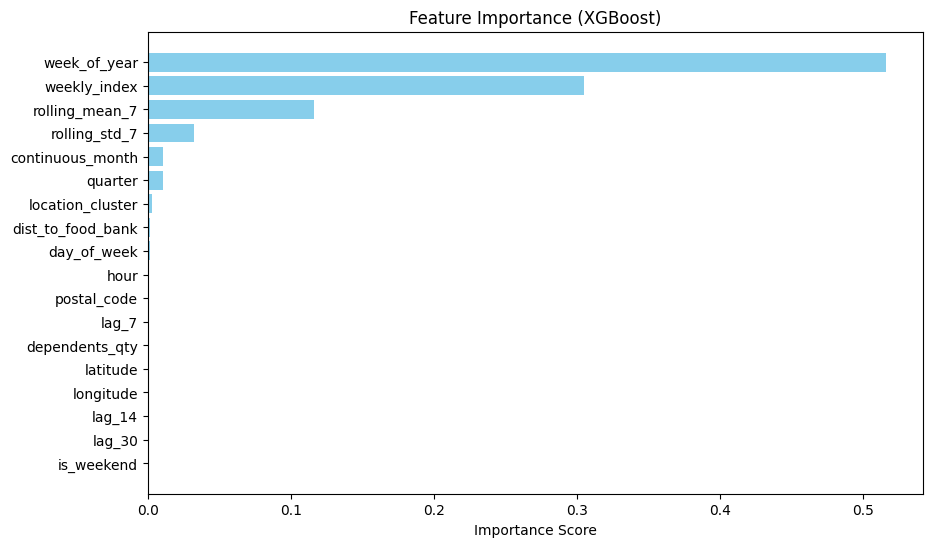

In [ ]:
# Keep only the specified features and target column
df = df[features + [target]]
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Split into X and y
X = df[features]
y = df[target]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through object type columns and encode them
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Fit model
model = XGBRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importance = model.feature_importances_
# Define features and target here, outside the loop and unindented
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_food_bank",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7",
            "postal_code", "continuous_month", "dependents_qty", "weekly_index"]  # All specified features
target = "quantity"
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display
print(importance_df)

# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
df3 = df.copy()
df3

#df3.to_csv('df3s.csv', index=False)

#imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df3['lag_7'] = imputer.fit_transform(df3[['quantity']])
df3['lag_14'] = imputer.fit_transform(df3[['quantity']])
df3['lag_30'] = imputer.fit_transform(df3[['quantity']])
df3['rolling_std_7'] = imputer.fit_transform(df3[['quantity']])
df3['rolling_mean_7'] = imputer.fit_transform(df3[['quantity']])
df3.to_csv('df3s.csv', index=False)

In [ ]:
#df3.to_csv('/content/Fcfm1f.Auto.cleanedFood Hampers Fact_CMPT3835.csv', index=False)


In [ ]:
#After Bayesian Optimization
"""
1️⃣ Complete the Hyperparameter Search

 tuner.search()

Use tuner.get_best_hyperparameters(num_trials=1)[0] .

2️⃣ Train the Final LSTM Model

Use the best hyperparameters from the tuning step.

Train the model on the full training set with early stopping.

3️⃣ Evaluate the Model

Test the trained model on the test set (X_test_lstm, y_test).

Compare metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE).

4️⃣ Make Predictions & Interpret Results

Use lstm_model.predict() to generate forecasts.

Compare predicted vs. actual quantity values.

5️⃣ Geospatial Analysis (Integration with Mapping)

Visualize the predicted demand on a heatmap or spatial plot.

Identify patterns in food hamper distribution across Edmonton.

6️⃣ Deploy or Package the Model

Save the model (.h5 or .pkl) for later use.

Create a simple API (Flask/FastAPI) for real-time predictions.

7️⃣ Report & Insights for Decision-Making

Summarize findings for Islamic Family to improve food distribution.

Provide recommendations based on demand trends.




"""

In [ ]:
#Optional: Visual Evaluation (Add to Report)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Food Hamper Quantities")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df['rolling_std_original'] = imputer.fit_transform(df[['rolling_std_original']])
df['rolling_std_boxcox'] = imputer.fit_transform(df[['rolling_std_boxcox']])
df.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df['lag_7'] = imputer.fit_transform(df[['lag_7']])
df['lag_14'] = imputer.fit_transform(df[['lag_14']])
df['lag_30'] = imputer.fit_transform(df[['lag_30']])



In [ ]:
df2['time_index'] = pd.to_datetime(df2['timestamp'])  # Ensure 'time_index' is a datetime column
time_series = df2.groupby('time_index')['quantity'].sum().to_frame()  # Create the time series with 'time_index' as the index
time_series['lag_7'] = time_series['quantity'].shift(7)  # Create lagged features using the .shift() method
time_series['lag_14'] = time_series['quantity'].shift(14)
time_series['lag_30'] = time_series['quantity'].shift(30)
time_series.isnull().sum()



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df['lag_7'] = imputer.fit_transform(df[['lag_7']])
df['lag_14'] = imputer.fit_transform(df[['lag_14']])
df['lag_30'] = imputer.fit_transform(df[['lag_30']])
df.isnull().sum()


In [ ]:
df


In [ ]:
#1. Hybrid Deep Learning Model for Multi-Output Prediction
#a.LSTM (Long Short-Term Memory) – for time-series forecasting of food hamper quantity.

#b.CNN (Convolutional Neural Networks) – for learning spatial patterns from location-based features.

#c.Dense Layers – for combining features and predicting multiple outputs.

In [ ]:
# LSTM Model for Time-Series Prediction
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer  # Import InputLayer
#from sklearn.model_selection import train_test_split, TimeSeriesSplit #Removed as it is not used
import pandas as pd

# Define features and target
features = ["week_of_year", "day_of_week", "hour", "quarter", "is_weekend",
            "latitude", "longitude", "location_cluster", "dist_to_center",
            "unemployment_rate", "median_income",
            "lag_7", "lag_14", "lag_30",
            "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# Drop NaN values
df = df.dropna().reset_index(drop=True)

# Split data into training and testing sets chronologically
# Use the last 90 days as test set
train_data = df[:-90]  # Changed from time_series to df
test_data = df[-90:]   # Changed from time_series to df

# Extract features and target for training and testing
X_train = train_data[features]
X_test = test_data[features]
y_train = train_data[target]
y_test = test_data[target]

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1) # Using X_train from chronological split
X_test_lstm = np.expand_dims(X_test, axis=1)   # Using X_test from chronological split

# Build LSTM model
lstm_model = Sequential([
    InputLayer(input_shape=(1, len(features))),  # Use InputLayer for input shape
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)
])

# Ensure all features are numeric
X_train_lstm = X_train_lstm.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Compile model
lstm_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

In [ ]:
#XGBoost Model for Additional Accuracy

import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
xgb_mae = np.mean(abs(xgb_model.predict(X_test) - y_test))

print(f"LSTM MAE: {lstm_mae}")
print(f"XGBoost MAE: {xgb_mae}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Conv1D, Flatten, Concatenate

# Define the number of timesteps and features for the time series data
# These values need to be determined based on your specific dataset and how you are preprocessing it.
timesteps = 10  # Example: Assume you have 10 time steps in your data
num_features = 5   # Example: Assume you have 5 features per time step
num_geo_features = 3 # Example: Assume you have 3 geospatial features


# Define input layers
time_series_input = Input(shape=(timesteps, num_features), name="time_series_input")  # LSTM input
geo_input = Input(shape=(num_geo_features,), name="geo_input")  # Geospatial features

# Time-Series Processing (LSTM)
x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)

# Geospatial Data Processing (Dense Layers)
y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)

# Merge LSTM & Geospatial branches
merged = Concatenate()([x, y])

# Output layers for quantity and wait time (removing category output)
quantity_output = Dense(1, activation="linear", name="quantity_output")(merged)  # Regression
wait_time_output = Dense(1, activation="linear", name="wait_time_output")(merged)  # Regression

# Define Model (without category output)
model = Model(inputs=[time_series_input, geo_input], outputs=[quantity_output, wait_time_output])

# Compile Model (adjust loss and metrics)
model.compile(optimizer="adam",
              loss={"quantity_output": "mse", "wait_time_output": "mse"},
              metrics={"quantity_output": "mae", "wait_time_output": "mae"})

# Model Summary
model.summary()

In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
from sklearn.cluster import KMeans
from sklearn.model_selection import TimeSeriesSplit

# Load Data
df = pd.read_csv('/content/Fcfm.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week_of_year"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["hour"] = df["timestamp"].dt.hour
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

df['lag_7'] = df['quantity'].shift(1).bfill()
df['lag_14'] = df['quantity'].shift(7).bfill()
df['lag_30'] = df['quantity'].shift(30).bfill()

df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

center = (53.5461, -113.4938)
df["dist_to_center"] = df.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), center).km, axis=1
)

scaler = MinMaxScaler()
df[["unemployment_rate", "median_income"]] = scaler.fit_transform(
    df[["unemployment_rate", "median_income"]]
)

df = df.dropna().reset_index(drop=True)

time_series_features = ["lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]
geo_features = ["latitude", "longitude", "location_cluster"]
target_quantity = "quantity"

timesteps = 10
num_features = len(time_series_features)
num_geo_features = len(geo_features)

num_samples = df.shape[0] - timesteps + 1
X_time_series = np.array([df[time_series_features].iloc[i:i + timesteps].values for i in range(num_samples)])
X_geo = df[geo_features].values
y_quantity = df[target_quantity].values[timesteps - 1:]

train_data = df[:-90]
test_data = df[-90:]

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

X_time_series_train, X_time_series_val, X_geo_train, X_geo_val, y_quantity_train, y_quantity_val = train_test_split(
    X_time_series, X_geo[timesteps - 1:], y_quantity, test_size=0.2, random_state=42
)

# Define the model
time_series_input = Input(shape=(timesteps, num_features), name="time_series_input")
geo_input = Input(shape=(num_geo_features,), name="geo_input")

x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)

y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)

merged = Concatenate()([x, y])

quantity_output = Dense(1, activation="linear", name="quantity_output")(merged)

model = Model(inputs=[time_series_input, geo_input], outputs=quantity_output)

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

model.fit(
    {"time_series_input": X_time_series_train, "geo_input": X_geo_train},
    y_quantity_train,
    epochs=50,
    batch_size=32,
    validation_data=({"time_series_input": X_time_series_val, "geo_input": X_geo_val}, y_quantity_val)
)


In [ ]:
# Address Overfitting (Quantity Prediction Only)
#a) Add Regularization:
# Dropout
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Conv1D, Flatten, Concatenate, Dropout  # Import Dropout

x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)  # Add dropout

y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)
y = Dropout(0.2)(y)  # Add dropout

# L2 Regularization
quantity_output = Dense(1, activation="linear", name="quantity_output", kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)

# Remove category_output layer

model = Model(inputs=[time_series_input, geo_input], outputs=quantity_output)


In [ ]:
#Address Overfitting (Category Output)  -- but removing category output completely
#a) Add Regularization:
# Dropout
x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)  # Add dropout

y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)
y = Dropout(0.2)(y)  # Add dropout

#L2 Regularization - only for quantity output now
quantity_output = Dense(1, activation="linear", name="quantity_output", kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)



In [ ]:
#Address Overfitting (Category Output)  -- but removing category output completely
#a) Add Regularization:
# Dropout
x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)  # Add dropout

y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)
y = Dropout(0.2)(y)  # Add dropout

#L2 Regularization
quantity_output = Dense(1, activation="linear", name="quantity_output", kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)


In [ ]:
# Address Overfitting (Quantity Prediction Only)
# a) Add Regularization:
# Dropout
x = LSTM(64, return_sequences=True)(time_series_input)
x = LSTM(32)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)  # Add dropout

y = Dense(32, activation="relu")(geo_input)
y = Dense(16, activation="relu")(y)
y = Dropout(0.2)(y)  # Add dropout

# L2 Regularization
quantity_output = Dense(1, activation="linear", name="quantity_output", kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)

# Remove category_output layer

model = Model(inputs=[time_series_input, geo_input], outputs=quantity_output)

# Compile the model again after making changes
model.compile(optimizer="adam", loss="mse", metrics=["mae"]) # This line is crucial

In [ ]:
import pandas as pd

# ... (your existing code for data loading and other preprocessing) ...

# 1. Create 'time_index'
df['time_index'] = pd.to_datetime(df['timestamp'])

# 2. Create Lagged Features and Rolling Standard Deviation
#    (We'll do this within a groupby to ensure alignment with 'time_index')
df = df.groupby('time_index').apply(lambda group: pd.DataFrame({
    'lag_7': group['quantity'].shift(1).bfill(),
    'lag_14': group['quantity'].shift(7).bfill(),
    'lag_30': group['quantity'].shift(30).bfill(),
    'rolling_std_original': group['quantity'].rolling(window=30).std()
})).reset_index()

# ... (rest of your code for model training or further analysis) ...

In [ ]:
#b. Early Stopping:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with only the quantity output and apply early stopping
model.fit(
    {"time_series_input": X_time_series_train, "geo_input": X_geo_train},
    y_quantity_train,  # Only provide the quantity target for training
    epochs=50,
    batch_size=32,
    validation_data=({"time_series_input": X_time_series_val, "geo_input": X_geo_val}, y_quantity_val),  # Only provide the quantity target for validation
    callbacks=[early_stopping]
)

In [ ]:
#XGBoost Model for Additional Accuracy
import xgboost as xgb
import numpy as np
import pandas as pd  # Import pandas

# Load the data
df = pd.read_csv('/content/Fcfm.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Feature Engineering: Recreate necessary features
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week_of_year"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["hour"] = df["timestamp"].dt.hour
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
# Lag features
df['lag_7'] = df['quantity'].shift(1).bfill()  # Shifted by 1 for daily lag
df['lag_14'] = df['quantity'].shift(7).bfill()  # Shifted by 7 for weekly lag
df['lag_30'] = df['quantity'].shift(30).bfill()  # Shifted by 30 for monthly lag
# Rolling features
df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()

# Geospatial Features
from sklearn.cluster import KMeans
from geopy.distance import geodesic

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

center = (53.5461, -113.4938)
df["dist_to_center"] = df.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), center).km, axis=1
)

# Socioeconomic Data Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["unemployment_rate", "median_income"]] = scaler.fit_transform(
    df[["unemployment_rate", "median_income"]]
)

# Drop NaN values after feature engineering
df = df.dropna().reset_index(drop=True)

# Define features and target based on available columns after feature engineering
features = ["year", "month", "week_of_year", "day_of_week", "hour", "quarter",
            "is_weekend", "latitude", "longitude", "location_cluster",
            "dist_to_center", "unemployment_rate", "median_income",
            "lag_7", "lag_14", "lag_30", "rolling_mean_7", "rolling_std_7"]
target = "quantity"

# Split data into training and testing sets chronologically
# Use the last 90 days as test set
train_data = df[:-90]
test_data = df[-90:]

# Extract features and target for training and testing
X_train = train_data[features]
X_test = test_data[features]
y_train = train_data[target]
y_test = test_data[target]

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models (Assuming you have an LSTM model: lstm_model)
# Reshape for LSTM
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# # Evaluate LSTM
# lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
xgb_mae = np.mean(abs(xgb_model.predict(X_test) - y_test))

# print(f"LSTM MAE: {lstm_mae}")
print(f"XGBoost MAE: {xgb_mae}")

In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is called 'df' and contains the heatmap data

# 1. Convert 'timestamp' to numerical representation (Unix timestamp)
df['timestamp_numerical'] = pd.to_datetime(df['timestamp']).astype(int) / 10**9

# 2. Select only numerical features for correlation, including the new 'timestamp_numerical'
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# 3. Calculate correlations on the numerical DataFrame
correlations = numerical_df.corr()['quantity'].abs().sort_values(ascending=False)

# 4. Get the top 15 features (excluding the target variable itself)
top_features = correlations[1:16].index

# 5. Ensure 'latitude', 'longitude', and 'postal_code' are included
essential_features = ['latitude', 'longitude', 'postal_code']
top_features = top_features.union(essential_features)

# 6. Create a new DataFrame with selected features and quantity using .loc
df_selected = df[top_features.union(['quantity'])].copy()  # Include 'quantity' and create a copy

# 7. Now you can safely modify df_selected without the warning
# No need to add 'quantity' again as it's already included
df_selected


In [ ]:
import pandas as pd

# ... (your existing code for data loading and other preprocessing) ...

# 1. Create 'time_index' and ensure 'hour', 'quarter' exist
df['time_index'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['time_index'].dt.hour  # Create or re-create 'hour' column
df['quarter'] = df['time_index'].dt.quarter # Create or re-create 'quarter' column

# Ensure location_cluster and dist_to_center are calculated before groupby
from sklearn.cluster import KMeans
from geopy.distance import geodesic

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

center = (53.5461, -113.4938)
df["dist_to_center"] = df.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), center).km, axis=1
)


# 2. Group by 'time_index' and apply feature engineering
df = df.groupby('time_index').apply(lambda group: pd.DataFrame({
    # Temporal features
    'hour': group['hour'].iloc[0],  # Use iloc[0] to get the first value
    'quarter': group['quarter'].iloc[0],  # Use iloc[0] to get the first value

    # Geospatial features - Access directly from the group
    'location_cluster': group['location_cluster'].iloc[0],
    'dist_to_center': group['dist_to_center'].iloc[0],

    # Lagged features
    'lag_7': group['quantity'].shift(1).bfill(),
    'lag_14': group['quantity'].shift(7).bfill(),
    'lag_30': group['quantity'].shift(30).bfill(),

    # Rolling features
    'rolling_mean_7': group['quantity'].rolling(window=7, min_periods=1).mean(),
    'rolling_std_7': group['quantity'].rolling(window=7, min_periods=1).std(),
    'rolling_std_original': group['quantity'].rolling(window=30).std()
    # ... add other engineered features here ...
})).reset_index()

# ... (rest of your code for model training or further analysis) ...

In [ ]:
!pip uninstall -y tensorflow numpy
!pip install --upgrade numpy==1.23.5 tensorflow
import numpy as np
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


In [ ]:
# Ensure necessary installations
!pip install scikit-learn==1.3.2 scikeras[tensorflow] tensorflow==2.18 numpy==1.24.3 imbalanced-learn mlxtend tensorflow-text


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

# 1️⃣ Custom scoring function (MAE)
def mae_scorer(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

scorer = make_scorer(mae_scorer, greater_is_better=False)  # Lower MAE is better

# 2️⃣ Define function to create LSTM model
def create_model(units=64, dropout=0.2):
    model = Sequential([
        InputLayer(input_shape=(1, len(features))),
        LSTM(units, return_sequences=True),
        Dropout(dropout),
        LSTM(units // 2, return_sequences=False),
        Dropout(dropout),
        Dense(16, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model
# ... (your existing imports and data loading) ...

# Load the data (Replace with your data loading code)
df = pd.read_csv('/content/Fcfm.Auto.cleanedFood Hampers Fact_CMPT3835.csv')

# Feature Engineering (Make sure these are applied to 'df')
# Convert 'time_index' to datetime if it exists; otherwise, convert 'timestamp'
if 'time_index' in df.columns:
    df['time_index'] = pd.to_datetime(df['time_index'])
    df.rename(columns={'time_index': 'timestamp'}, inplace=True)  # Rename to 'timestamp'
else:
    df["timestamp"] = pd.to_datetime(df["timestamp"])

df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["week_of_year"] = df["timestamp"].dt.isocalendar().week
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["hour"] = df["timestamp"].dt.hour
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

df['lag_7'] = df['quantity'].shift(1).bfill()  # Lag 7
df['lag_14'] = df['quantity'].shift(7).bfill()  # Lag 14
df['lag_30'] = df['quantity'].shift(30).bfill()  # Lag 30

df["rolling_mean_7"] = df["quantity"].rolling(window=7, min_periods=1).mean()
df["rolling_std_7"] = df["quantity"].rolling(window=7, min_periods=1).std()

# ... (your geospatial feature engineering using KMeans and dist_to_center) ...

# ... (your socioeconomic data normalization using MinMaxScaler) ...

# ... (rest of your code) ...

!pip install scikit-learn==1.3.2 scikeras[tensorflow] tensorflow==2.18 numpy==1.24.3 imbalanced-learn mlxtend tensorflow-text

#Strategies to Improve LSTM Performance:
# Adjust LSTM Architecture
lstm_model = Sequential([
    InputLayer(input_shape=(1, len(features))),
    LSTM(128, return_sequences=True),  # Increased units
    Dropout(0.3),  # Increased dropout
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1)
])

# Hyperparameter Tuning (Example using Grid Search)
from sklearn.model_selection import GridSearchCV
# Import KerasRegressor from scikeras.wrappers
from scikeras.wrappers import KerasRegressor

def create_model(units=64, dropout=0.2):
    # ... (your LSTM model definition) ...
    # Make sure to return the lstm_model here:
    return lstm_model

model = KerasRegressor(build_fn=create_model, verbose=0)
param_grid = {'units': [64, 128], 'dropout': [0.2, 0.3],
              'model__epochs': [10, 20],  # Pass epochs as a model parameter
              'model__batch_size': [32, 64]}  # Pass batch_size as a model parameter
# Wrap 'epochs' and 'batch_size' with 'model__'
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_lstm, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
               validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

# Apply early stopping and train final model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

final_model.fit(X_train_lstm, y_train,
                epochs=best_params['fit__epochs'],
                batch_size=best_params['fit__batch_size'],
                validation_data=(X_test_lstm, y_test),
                callbacks=[early_stopping])

In [ ]:
!pip install scikit-learn==1.3.2 scikeras[tensorflow] tensorflow==2.18 numpy==1.24.3 imbalanced-learn mlxtend tensorflow-text

#Strategies to Improve LSTM Performance:
# Adjust LSTM Architecture
lstm_model = Sequential([
    InputLayer(input_shape=(1, len(features))),
    LSTM(128, return_sequences=True),  # Increased units
    Dropout(0.3),  # Increased dropout
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1)
])

# Hyperparameter Tuning (Example using Grid Search)
from sklearn.model_selection import GridSearchCV
# Import KerasRegressor from scikeras.wrappers
from scikeras.wrappers import KerasRegressor

def create_model(units=64, dropout=0.2):
    # ... (your LSTM model definition) ...
    # Make sure to return the lstm_model here:
    return lstm_model

model = KerasRegressor(build_fn=create_model, verbose=0)
param_grid = {'units': [64, 128], 'dropout': [0.2, 0.3],
              'model__epochs': [10, 20],  # Pass epochs as a model parameter
              'model__batch_size': [32, 64]}  # Pass batch_size as a model parameter
# Wrap 'epochs' and 'batch_size' with 'model__'
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_lstm, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
               validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'quantity' is the demand column
# Select relevant features for correlation analysis
features = ['quantity', 'year', 'month', 'week_of_year', 'day_of_week', 'hour',
            'quarter', 'is_weekend', 'lag_7', 'lag_14',
            'lag_30', 'rolling_mean_7', 'rolling_std_7',
            'latitude', 'longitude', 'location_cluster', 'dist_to_food_bank',
            'unemployment_rate', 'median_income']

# Calculate correlation matrix
correlation_matrix = df[features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Demand and Other Features')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'quantity' is the demand column
# Select relevant features for correlation analysis
features = ['quantity', 'year', 'month', 'week_of_year', 'day_of_week', 'hour',
            'quarter', 'is_weekend', 'lag_7', 'lag_14',
            'lag_30', 'rolling_mean_7', 'rolling_std_7',
            'latitude', 'longitude', 'location_cluster', 'dist_to_center',
            'unemployment_rate', 'median_income']

# Calculate correlation matrix
correlation_matrix = df[features].corr()

# Get absolute correlation ivalues with 'quantity'
feature_importance = correlation_matrix['quantity'].abs().sort_values(ascending=False)

# Remove 'quantity' itself (correlation with itself is 1)
feature_importance = feature_importance.drop('quantity')

# Print feature importance values
print("Feature Importance (based on absolute correlation with 'quantity'):")
print(feature_importance)

In [ ]:
# ... (your existing code for data loading, feature selection, and model training) ...

# 1. Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test) # Assuming X_test is your test data

# 2. Get SHAP-based feature importance
shap_importance = pd.DataFrame(list(zip(X_test.columns, np.abs(shap_values).mean(0))),
                               columns=['feature', 'shap_importance'])
shap_importance = shap_importance.sort_values(by=['shap_importance'], ascending=False)

# 3. Calculate correlation-based feature importance (your existing code)
features = ['quantity', 'year', 'month', 'week_of_year', 'day_of_week', 'hour',
            'quarter', 'is_weekend', 'lag_7', 'lag_14',
            'lag_30', 'rolling_mean_7', 'rolling_std_7',
            'latitude', 'longitude', 'location_cluster', 'dist_to_center',
            'unemployment_rate', 'median_income']
correlation_matrix = df[features].corr()
feature_importance_corr = correlation_matrix['quantity'].abs().sort_values(ascending=False)
feature_importance_corr = feature_importance_corr.drop('quantity')

# 4. Combine and compare feature importance
# Change here: Reset index of feature_importance_corr to make 'feature' a column
combined_importance = pd.merge(shap_importance, feature_importance_corr.reset_index().rename(columns={'index': 'feature', 'quantity': 'corr_importance'}),
                               on='feature', how='left')

# 5. Print or visualize combined importance
print("Combined Feature Importance:")
print(combined_importance)

# (Optional) Visualize combined importance using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='shap_importance', data=combined_importance)
plt.xticks(rotation=90)
plt.title('SHAP-based Feature Importance')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='corr_importance', data=combined_importance)
plt.xticks(rotation=90)
plt.title('Correlation-based Feature Importance')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np  # Import numpy if not already imported

# ... (your existing code for data loading, feature selection, and SHAP calculation) ...

# Assuming X_test contains all 15 features used for SHAP analysis:
X_test_selected = X_test

# SHAP values are likely in shap_values, convert to NumPy array if needed:
shap_array = shap_values.values if isinstance(shap_values, pd.DataFrame) else shap_values

# Create the Plotly figure
fig = go.Figure(data=[
    go.Scatter(
        x=shap_array[:, i],
        y=[X_test_selected.columns[i]] * len(shap_values),
        mode='markers',
        marker=dict(
            size=10,
            color=shap_array[:, i],
            colorscale='RdBu',
            showscale=True
        ),
        name=X_test_selected.columns[i]
    ) for i in range(shap_array.shape[1])  # Iterate through all 15 features
])

fig.update_layout(
    title='SHAP Values for Each Feature',
    xaxis_title='SHAP Value',
    yaxis_title='Feature',
    hovermode='closest'
)
fig.show()